# G2M insight for Cab Investment firm

## Client Description:

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

## Project Details:

We have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

Here are some of the hypotheses we will be exploring in this Jupyter Notebook:
1. The number of cab rides taken is higher in cities with higher populations.
2. Cab users are more likely to pay with card than with cash. 
3. There is a correlation between the distance traveled and the fare charged. 
4. The number of cab rides has increased over the time period covered in the dataset. 
5. One of the cab companies has a higher percentage of femal customers than the other. 
6. The prices charged by cab companies increase over the time period covered in the dataset.

## Datasets:

We have been provided 4 individual data sets. Time period of data is from <i> 31/01/2016 to 31/12/2018</i>.
Below are the list of datasets which are provided for the analysis:

<b>Cab_Data.csv –</b> this file includes details of transaction for 2 cab companies. \
<b>Customer_ID.csv –</b> this is a mapping table that contains a unique identifier which links the customer’s demographic details. \
<b>Transaction_ID.csv –</b> this is a mapping table that contains transaction to customer mapping and payment mode. \
<b>City.csv –</b> this file contains list of US cities, their population and number of cab users. 

The <i>holidays</i> dataset in the holidays package provides information about various holidays observed in different countries, including the United States. This dataset includes the following information for each holiday:

- <b>date:</b> The date of the holiday.
- <b>name:</b> The name or description of the holiday.
- <b>country:</b> The country where the holiday is observed (e.g., "United States").
- <b>observed:</b> Indicates if the holiday is observed on a different date than the actual date.
- <b>public:</b> Indicates if the holiday is a public holiday.
- <b>fixed_date:</b> Indicates if the holiday falls on a fixed date every year.
- <b>year:</b> The year(s) for which the holiday is applicable.
- <b>type:</b> The type or category of the holiday (e.g., "national holiday", "observance", etc.).

## Import libraries and load datasets

In this section, necessary libraries such as pandas, matplotlib, seaborn, and numpy are imported. These libraries will be used throughout the notebook for data manipulation, visualisation, and analysis.

In [2]:
# Import necessary libraries
import pandas as pd
from datetime import datetime
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import holidays
from statsmodels.tsa.arima.model import ARIMA

The datasets are then loaded into the notebook as dataframes. The datasets include the cab data, city data, customer ID data, and the transaction ID data.

In [3]:
# Load the data sets
cab_df = pd.read_csv('DataSets/Cab_Data.csv')
customer_df = pd.read_csv('DataSets/Customer_ID.csv')
transaction_df = pd.read_csv('DataSets/Transaction_ID.csv')
city_df = pd.read_csv('DataSets/City.csv')

### Data Exploration

In this section, the datasets are explored to get a better understanding of the data. Some of the explorations include checking for missing values, checking the number of unique values, and getting the statistical summary of the data.

In [5]:
# Explore the cab dataset
print("\nCab data shape: ", cab_df.shape)
print("\nCab data head: \n", cab_df.head())
print("\nCab data info: \n", cab_df.info())
print("\nCab data description: \n", cab_df.describe())

# Explore the customer dataset
print("\nCustomer data shape: ", customer_df.shape)
print("\nCustomer data head: \n", customer_df.head())
print("\nCustomer data info: \n", customer_df.info())
print("\nCustomer data description: \n", customer_df.describe())

# Explore the transation dataset
print("\nTransaction data shape: ", transaction_df.shape)
print("\nTransaction data head: \n", transaction_df.head())
print("\nTransaction data info: \n", transaction_df.info())
print("\nTransaction data description: \n", transaction_df.describe())

# Explore the city dataset
print("\nCity data shape: ", city_df.shape)
print("\nCity data head: \n", city_df.head())
print("\nCity data info: \n", city_df.info())
print("\nCity data description: \n", city_df.describe())


Cab data shape:  (359392, 7)

Cab data head: 
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         

## Data Cleaning and Reformating:

In this section, the datasets are cleaning to prepare them for analysis. Some of the cleaning tasks include dropping unecessary columns, converting data types, and merging datasets.

The date format on the Cab_Data.csv dataset is not in the correct format so after loading the datasets, we created a function to modify the format of the 'Date to Travel' column so that it matches the following format:"d-m-Y". We then create a new column in the dataframe with the updated travel date.

In [6]:
def format_to_date(date):
    date_of_travel =(datetime(1899,12,30) + timedelta(date-1)).strftime("%d-%m-%Y")
    updated_date =  datetime.strptime(date_of_travel, "%d-%m-%Y")
    return updated_date

In [7]:
cab_df['Updated date of travel'] = cab_df['Date of Travel'].apply(lambda x:format_to_date(x))
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02


Next we check for missing values in each dataset and if there are missing values, we will fill them. If not we will continue with our data cleaning.

In [8]:
# Check for missing values in each data set
print("\nMissing values in Cab data: \n", cab_df.isnull().sum())
print("\nMissing values in Customer data: \n", customer_df.isnull().sum())
print("\nMissing values in Transaction data: \n", transaction_df.isnull().sum())
print("\nMissing values in City data: \n", city_df.isnull().sum())


Missing values in Cab data: 
 Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Updated date of travel    0
dtype: int64

Missing values in Customer data: 
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Missing values in Transaction data: 
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Missing values in City data: 
 City          0
Population    0
Users         0
dtype: int64


No values were found missing so the next step will be to merge the datasets based on common features. 

In [9]:
# Merge the data sets based on the common keys
merged_df = pd.merge(cab_df, transaction_df, on='Transaction ID')
merged_df = pd.merge(merged_df, city_df, on='City')
merged_df = pd.merge(merged_df, customer_df, on = 'Customer ID')
print("\nMerged data set shape: ", merged_df.shape)


Merged data set shape:  (359392, 15)


In [10]:
# We create a new column Year where we extract the year from the updated date of travel
merged_df['Year'] = merged_df['Updated date of travel'].dt.year

In [ ]:
# Fetch US holidays for the years 2016 to 2018
us_holidays = holidays.UnitedStates(years=[2016, 2017, 2018])

# Print the holidays
for date, name in sorted(us_holidays.items()):
    print(date, name)

2016-01-01 New Year's Day
2016-01-18 Martin Luther King Jr. Day
2016-02-15 Washington's Birthday
2016-05-30 Memorial Day
2016-07-04 Independence Day
2016-09-05 Labor Day
2016-10-10 Columbus Day
2016-11-11 Veterans Day
2016-11-24 Thanksgiving
2016-12-25 Christmas Day
2016-12-26 Christmas Day (Observed)
2017-01-01 New Year's Day
2017-01-02 New Year's Day (Observed)
2017-01-16 Martin Luther King Jr. Day
2017-02-20 Washington's Birthday
2017-05-29 Memorial Day
2017-07-04 Independence Day
2017-09-04 Labor Day
2017-10-09 Columbus Day
2017-11-10 Veterans Day (Observed)
2017-11-11 Veterans Day
2017-11-23 Thanksgiving
2017-12-25 Christmas Day
2018-01-01 New Year's Day
2018-01-15 Martin Luther King Jr. Day
2018-02-19 Washington's Birthday
2018-05-28 Memorial Day
2018-07-04 Independence Day
2018-09-03 Labor Day
2018-10-08 Columbus Day
2018-11-11 Veterans Day
2018-11-12 Veterans Day (Observed)
2018-11-22 Thanksgiving
2018-12-25 Christmas Day


In [11]:
# Fetch US holidays for the years 2016 to 2018
us_holidays = holidays.UnitedStates(years=[2016, 2017, 2018])
us_holidays_dates = us_holidays.keys()

# Create a new column 'Is Holiday' with default value as False
merged_df['Is Holiday'] = False

# Iterate over the rows in the DataFrame
for index, row in merged_df.iterrows():
    # Convert 'Date of Travel' to date format
    travel_date = pd.to_datetime(row['Updated date of travel']).date()
    # Check if the date is a holiday

    if travel_date in us_holidays_dates:
        merged_df.at[index, 'Is Holiday'] = True

In [12]:
merged_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Year,Is Holiday
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-07,29290,Card,"814,885","24,701",Male,28,10813,2016,False
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-20,29290,Cash,"814,885","24,701",Male,28,10813,2018,False
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-22,29290,Card,"814,885","24,701",Male,28,10813,2018,True
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-05,27703,Card,"814,885","24,701",Male,27,9237,2016,False
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-20,27703,Card,"814,885","24,701",Male,27,9237,2018,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,2018-03-02,51406,Cash,"418,859","127,001",Female,29,6829,2018,False
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,2018-04-12,51406,Cash,"418,859","127,001",Female,29,6829,2018,False
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,2018-07-05,51406,Card,"418,859","127,001",Female,29,6829,2018,False
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,2018-08-01,51406,Cash,"418,859","127,001",Female,29,6829,2018,False


In [13]:
# Check that there are True values in the added Is Holiday column
temp_df = merged_df.loc[merged_df['Is Holiday'] == True]
print(temp_df)

        Transaction ID  Date of Travel     Company           City  \
2             10412921           43427  Yellow Cab     ATLANTA GA   
7             10000013           42371    Pink Cab     ATLANTA GA   
24            10000384           42371  Yellow Cab     ATLANTA GA   
26            10254432           43050  Yellow Cab     ATLANTA GA   
51            10000392           42371  Yellow Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359090        10261515           43051  Yellow Cab  WASHINGTON DC   
359222        10265899           43063  Yellow Cab  WASHINGTON DC   
359295        10262841           43063    Pink Cab  WASHINGTON DC   
359299        10407212           43416  Yellow Cab  WASHINGTON DC   
359385        10439949           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip Updated date of travel  \
2              42.55         792.05      597.4020             2018-11-22   
7               9.0

In [14]:
# Explore the merged dataset
print("\nmerged data shape: ", merged_df.shape)
print("\nmerged data head: \n", merged_df.head())
print("\nmerged data info: \n", merged_df.info())
print("\nmerged data description: \n", merged_df.describe())


merged data shape:  (359392, 17)

merged data head: 
    Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip Updated date of travel  Customer ID  \
0         370.95      313.6350             2016-01-07        29290   
1         598.70      317.4228             2018-07-20        29290   
2         792.05      597.4020             2018-11-22        29290   
3         358.52      334.8540             2016-01-05        27703   
4         721.10      467.1192             2018-04-20        27703   

  Payment_Mode Population     Users Gender  Age  Income (USD/Month)  Year

In [15]:
# Check for missing values in merged data
print("\nMissing values in merged data: \n", merged_df.isnull().sum())


Missing values in merged data: 
 Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Updated date of travel    0
Customer ID               0
Payment_Mode              0
Population                0
Users                     0
Gender                    0
Age                       0
Income (USD/Month)        0
Year                      0
Is Holiday                0
dtype: int64


After merging the datasets, we check for any duplicates. If duplicates are found, they will be dropped. 

In [16]:
# Drop duplicate rows if any
if merged_df.drop_duplicates(inplace=True):
    print("\nMerged data set shape after dropping duplicates: ", merged_df.shape)
else:
    print("\nNo duplicates to drop.")


No duplicates to drop.


In [17]:
# Sort the dates values so that it will be easier to visualise the data later on
merged_df.sort_values(by='Updated date of travel', inplace=True)
merged_df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Year,Is Holiday
325663,10436500,43465,Yellow Cab,WASHINGTON DC,11.00,166.49,132.0000,2018-12-30,53140,Card,"418,859","127,001",Female,40,7870,2018,False
159597,10433435,43465,Pink Cab,MIAMI FL,2.30,29.53,23.9200,2018-12-30,9774,Cash,"1,339,155","17,675",Female,33,14322,2018,False
23407,10436696,43465,Pink Cab,BOSTON MA,27.55,377.85,330.6000,2018-12-30,60000,Cash,"248,968","80,021",Female,27,20303,2018,False
117860,10433418,43465,Pink Cab,LOS ANGELES CA,2.34,29.21,25.0380,2018-12-30,7650,Card,"1,595,037","144,132",Female,32,17629,2018,False
87418,10434637,43465,Yellow Cab,CHICAGO IL,3.36,44.86,43.9488,2018-12-30,5926,Card,"1,955,130","164,468",Male,58,31841,2018,False


In [187]:
# We split the merged data into two dataset for every Cab company to analyze them individually
pink_data = merged_df[merged_df['Company'] == 'Pink Cab'] 
yellow_data = merged_df[merged_df['Company'] == 'Yellow Cab']
selected_columns = ['KM Travelled','Price Charged','Cost of Trip', 'Age' ,'Income (USD/Month)']

In [188]:
# Getting the statistical information for the pink cab company
pink_stats = pink_data[selected_columns]
pink_stats = pink_data.describe()
pink_stats

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Year,Profit
count,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00,84711.00
mean,10223938.22,42975.18,22.56,310.80,248.15,18422.58,35.32,15059.05,2017.05,62.65
std,126178.21,305.50,12.23,182.00,135.40,18084.83,12.64,7991.08,0.80,77.59
min,10000011.00,42371.00,1.90,15.60,19.00,1.00,18.00,2000.00,2016.00,-220.06
25%,10110143.50,42700.00,12.00,159.97,131.87,5317.50,25.00,8371.00,2016.00,11.21
50%,10225904.00,43000.00,22.44,298.06,246.33,8876.00,33.00,14713.00,2017.00,41.50
75%,10336416.50,43252.00,32.96,441.50,360.18,27190.00,42.00,21055.00,2018.00,93.97
max,10437615.00,43465.00,48.00,1623.48,576.00,60000.00,65.00,35000.00,2018.00,1119.48


In [189]:
# Getting the statistical information for the yellow cab company
yellow_stats = yellow_data[selected_columns]
yellow_stats = yellow_data.describe()
yellow_stats

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Year,Profit
count,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00,274681.00
mean,10219781.39,42960.64,22.57,458.18,297.92,19428.83,35.34,15045.67,2017.04,160.26
std,126982.92,307.99,12.23,288.39,162.55,21830.79,12.58,7962.73,0.80,171.82
min,10000384.00,42371.00,1.90,20.73,22.80,1.00,18.00,2000.00,2016.00,-176.93
25%,10110836.00,42695.00,11.99,226.68,158.40,2403.00,25.00,8439.00,2016.00,37.18
50%,10219868.00,42984.00,22.44,425.06,295.60,6445.00,33.00,14676.00,2017.00,102.00
75%,10329386.00,43225.00,32.96,633.88,432.43,38916.00,42.00,21023.00,2018.00,228.67
max,10440107.00,43465.00,48.00,2048.03,691.20,60000.00,65.00,34996.00,2018.00,1463.97


In [190]:
#Outlier points and lower-upper limits were analyzed by IQR method by filtering the data from the statistical value table of the desired variables.
def IQRstats(df_stats,col):
    
    mean   = df_stats[col][1]
    median = df_stats[col][5]
    median_mean_ratio = median/mean
    Q1     = df_stats[col][4]
    Q3     = df_stats[col][6]
    IQR    = Q3-Q1
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    
    print('\n\n' + "mean of : " + str(col) + " is " + str(mean) +
          '\n' + "median of : " + str(col) + " is " + str(median) +
          '\n' + "median/mean ratio of : " +  str(col) + " is " + str(median_mean_ratio) +
          '\n' + "Q1 value of : "  + str(col) + " is "  + str(Q1) +
          '\n' + "Q3 value of : "  + str(col) + " is "  + str(Q3) + 
          '\n' + "IQR value of : " + str(col) + " is " + str(IQR) + 
          '\n' + "Upper and Lower Limits of " + str(col) + " is "  + str((lower_band,upper_band))
         )
    
    return upper_band , lower_band

In [191]:
print('Statistical infos of Pink Cab Firm :')
for column_name in selected_columns :
    upper_band , lower_band = IQRstats(pink_stats , column_name)
    outliers = pink_data[(pink_data[column_name] < lower_band) | (pink_data[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Statistical infos of Pink Cab Firm :


mean of : KM Travelled is 22.559916775861463
median of : KM Travelled is 22.44
median/mean ratio of : KM Travelled is 0.9946845204681886
Q1 value of : KM Travelled is 12.0
Q3 value of : KM Travelled is 32.96
IQR value of : KM Travelled is 20.96
Upper and Lower Limits of KM Travelled is (-19.44, 64.4)

KM Travelled has 0 outliers : []


**********************************************************



mean of : Price Charged is 310.8008562052154
median of : Price Charged is 298.06
median/mean ratio of : Price Charged is 0.9590063670969978
Q1 value of : Price Charged is 159.97
Q3 value of : Price Charged is 441.505
IQR value of : Price Charged is 281.53499999999997
Upper and Lower Limits of Price Charged is (-262.3325, 863.8074999999999)

Price Charged has 237 outliers : [ 997.84 1021.72  870.29 1022.59  983.99  873.5   886.72  865.58  930.74
  902.75  905.57 1014.03  977.81  874.86  870.32  904.9   908.94  894.8
  916.57  869.07  868.19  874.55 1319.52

## Data Visualisations:

In this section, the cleaned dataset is visualised to better understand the data and answer some questions related to the cab investment firm case study. Some of the visualisation include the number of rides by company, the number of rides by payment mode, the number of rides by city, and the average proce charged and cost of trip by company. 

In our merged table, we can see that the price charged by the cab companies is different from the cost of the trips. It would be interesting for us to have. a preview of the profits made for each trip.

In [18]:
# Calculate the profits made per trips and add a new column to the merged dataset file
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Updated date of travel,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month),Year,Is Holiday,Profit
12812,10000429,42371,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,2016-01-01,57474,Card,"248,968","80,021",Male,34,16558,2016,True,137.1860
43828,10000525,42371,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,2016-01-01,4551,Cash,"1,955,130","164,468",Male,19,6316,2016,True,25.0484
297325,10001234,42371,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,2016-01-01,38146,Cash,"671,238","25,063",Male,36,6577,2016,True,577.9420
316639,10001311,42371,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,2016-01-01,53048,Card,"418,859","127,001",Male,23,31566,2016,True,233.9280
171893,10000927,42371,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,2016-01-01,1808,Cash,"8,405,837","302,149",Male,59,18999,2016,True,635.8876


In [19]:
# Calculate the total number of rides for each cab company
total_rides = merged_df.groupby('Company')['Company'].count()

# Calculate the average profit per ride for each cab company
average_profit = merged_df.groupby('Company')['Profit'].mean()

# Calculate the total profit made by each cab company
total_profit = merged_df.groupby('Company')['Profit'].sum()
total_profit = total_profit.round(2)

# Create a new DataFrame to store the results
rides_profit_df = pd.DataFrame({
    'Total Rides': total_rides,
    'Average Profit per Ride': average_profit,
    'Total Profit': total_profit
})

# Format the 'Total Profit' column to display as a float with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Display the DataFrame
print(rides_profit_df)

            Total Rides  Average Profit per Ride  Total Profit
Company                                                       
Pink Cab          84711                    62.65    5307328.32
Yellow Cab       274681                   160.26   44020373.17


In [20]:
# Calculate the percentage of cab users in each city
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

city_df['Cab Users %'] = city_df['Users'] / city_df['Population'] * 100

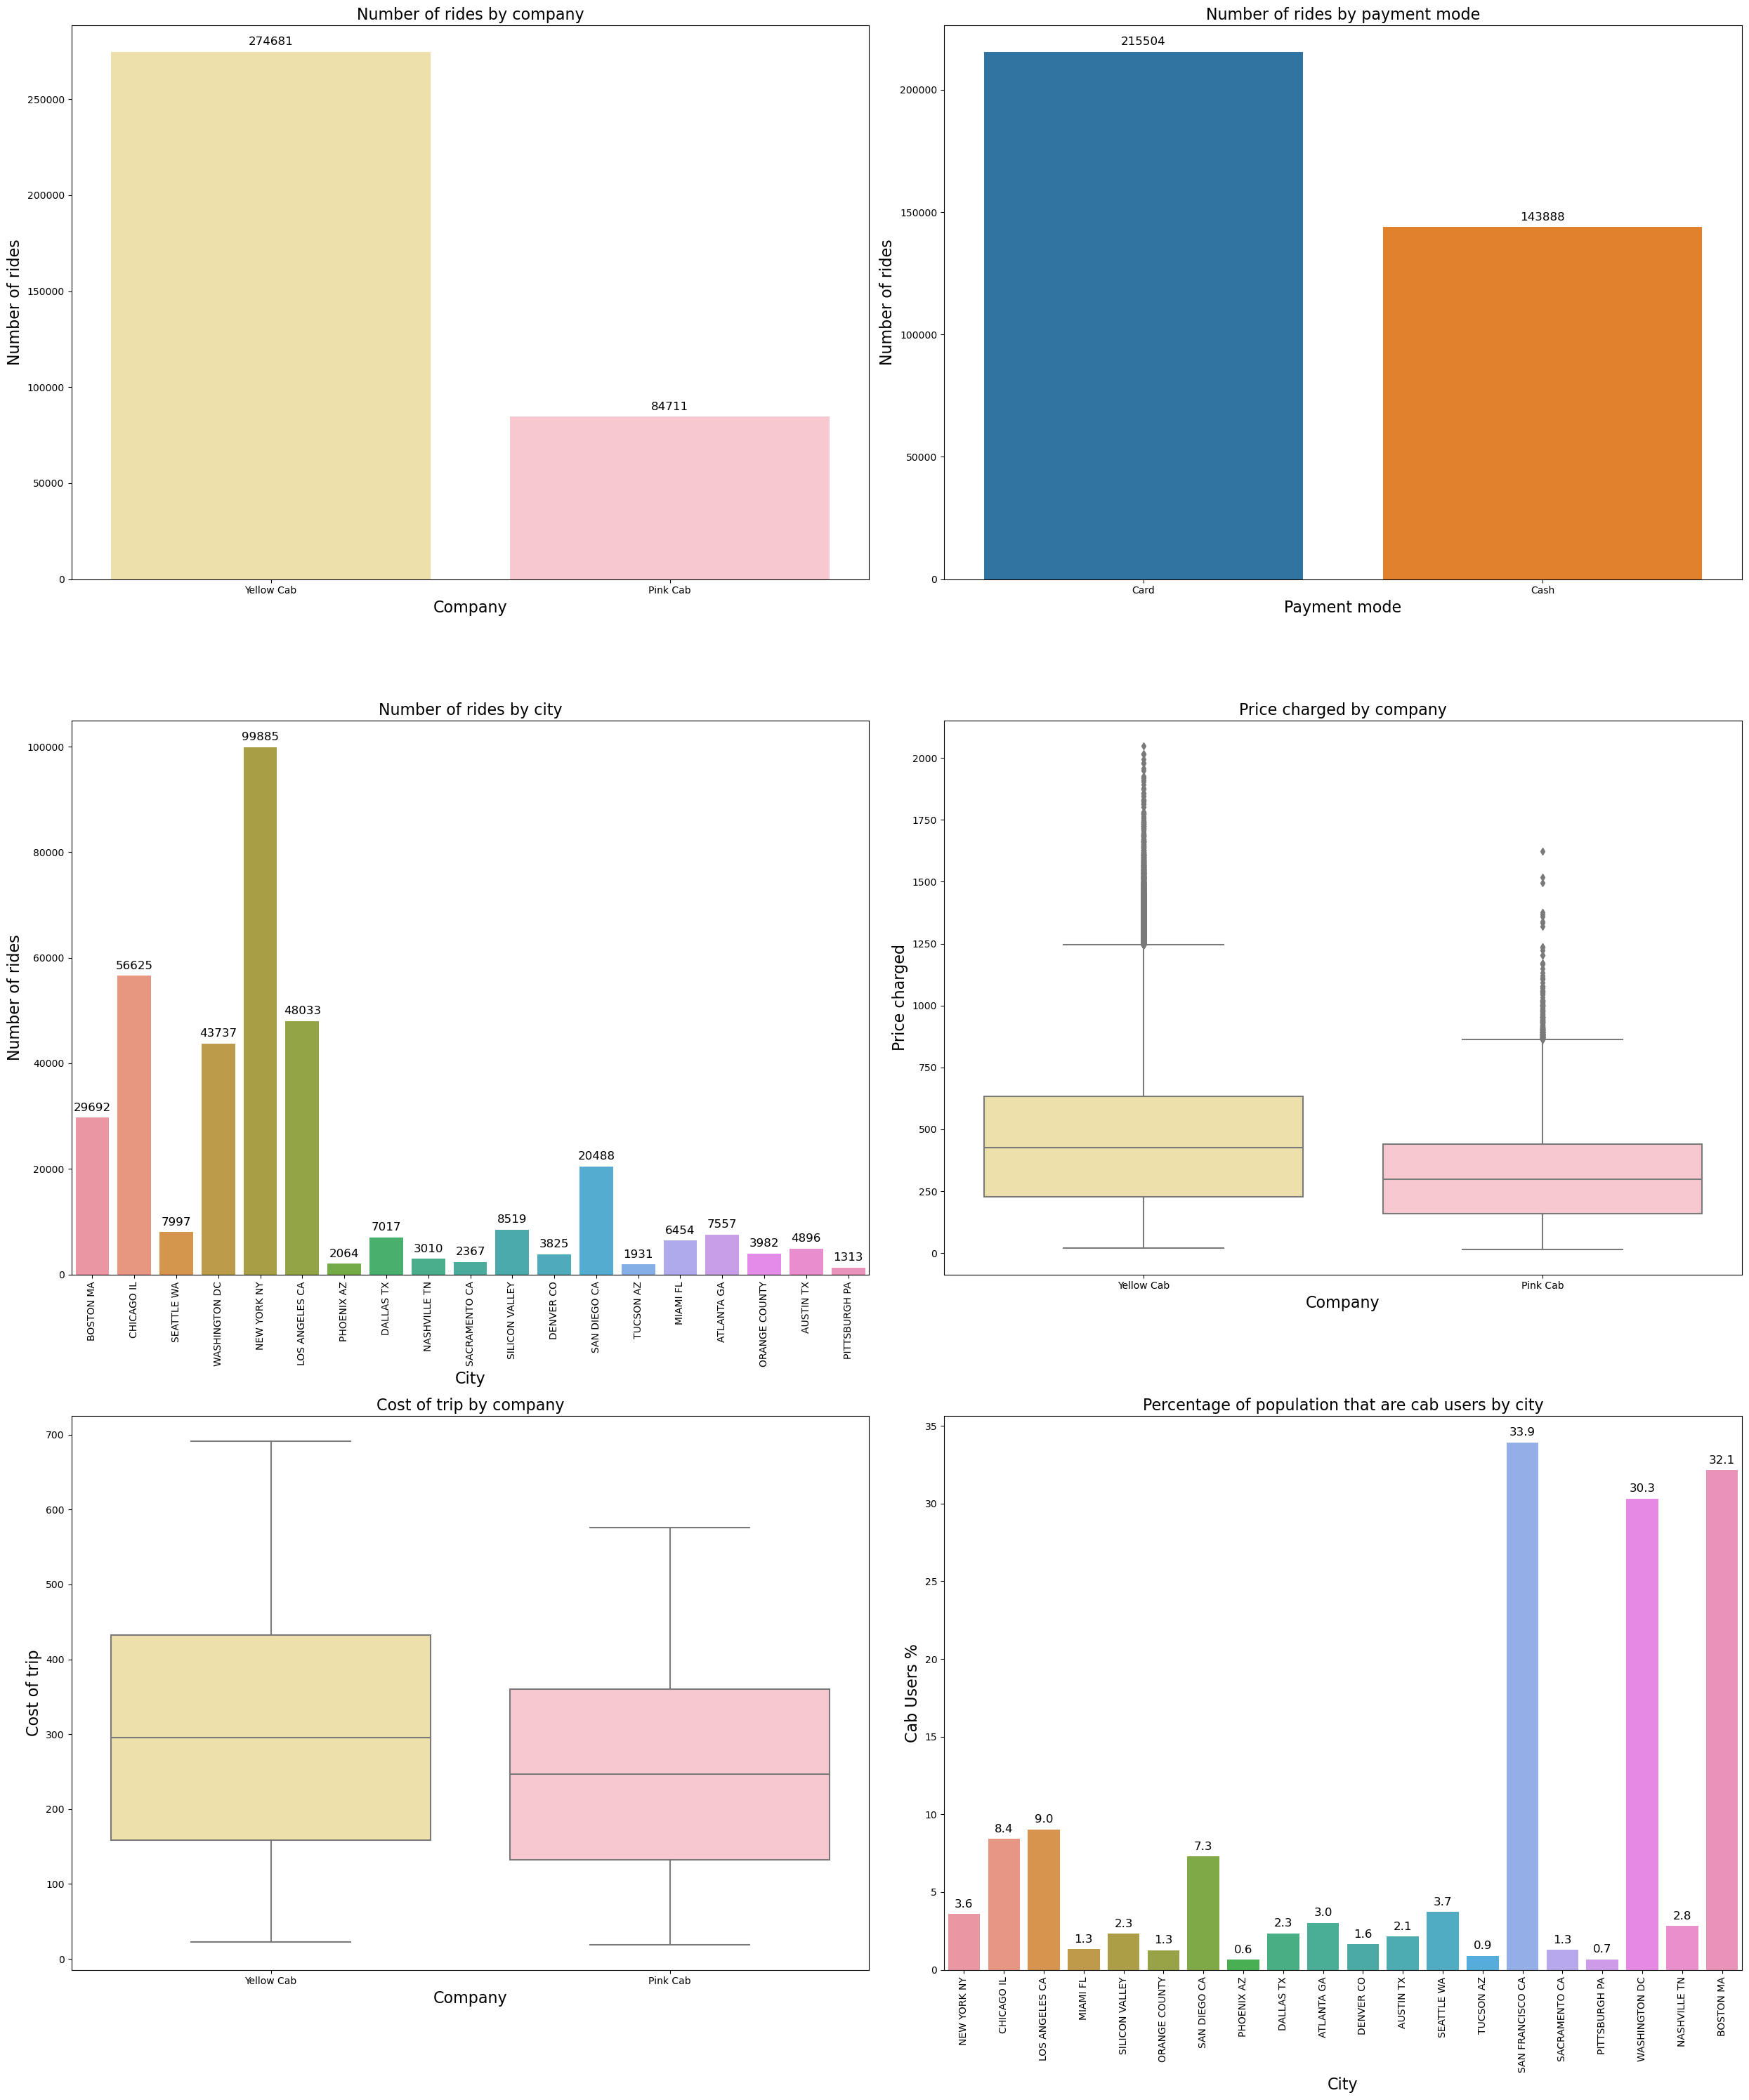

In [227]:
# Visualize the data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 30))

sns.countplot(x='Company', data=merged_df, ax=axs[0, 0], palette=['#F9E79F', 'pink'])
axs[0, 0].set_title('Number of rides by company', fontsize=16)
axs[0, 0].set_xlabel('Company', fontsize=16)
axs[0, 0].set_ylabel('Number of rides', fontsize=16)

# Add values to the countplot
for p in axs[0, 0].patches:
    axs[0, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)

sns.countplot(x='Payment_Mode', data=merged_df, ax=axs[0, 1])
axs[0, 1].set_title('Number of rides by payment mode', fontsize=16)
axs[0, 1].set_xlabel('Payment mode', fontsize=16)
axs[0, 1].set_ylabel('Number of rides', fontsize=16)

# Add values to the countplot
for p in axs[0, 1].patches:
    axs[0, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)

sns.countplot(x='City', data=merged_df, ax=axs[1, 0])
axs[1, 0].set_title('Number of rides by city', fontsize=16)
axs[1, 0].set_xlabel('City', fontsize=16)
axs[1, 0].set_ylabel('Number of rides', fontsize=16)
axs[1, 0].tick_params(axis='x', rotation=90)

# Add values to the countplot
for p in axs[1, 0].patches:
    axs[1, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)

sns.boxplot(x='Company', y='Price Charged', data=merged_df, ax=axs[1, 1], palette=['#F9E79F', 'pink'])
axs[1, 1].set_title('Price charged by company', fontsize=16)
axs[1, 1].set_xlabel('Company', fontsize=16)
axs[1, 1].set_ylabel('Price charged', fontsize=16)

sns.boxplot(x='Company', y='Cost of Trip', data=merged_df, ax=axs[2, 0], palette=['#F9E79F', 'pink'])
axs[2, 0].set_title('Cost of trip by company', fontsize=16)
axs[2, 0].set_xlabel('Company', fontsize=16)
axs[2, 0].set_ylabel('Cost of trip', fontsize=16)

sns.barplot(x='City', y='Cab Users %', data=city_df, ax=axs[2, 1])
axs[2, 1].set_title('Percentage of population that are cab users by city', fontsize=16)
axs[2, 1].set_xlabel('City', fontsize=16)
axs[2, 1].set_ylabel('Cab Users %', fontsize=16)
axs[2, 1].tick_params(axis='x', rotation=90)

# Add values to the barplot
for p in axs[2, 1].patches:
    axs[2, 1].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()


From the plots above, we can see that over the time period from 31/01/2016 to 31/12/2018, the yellow company has had more trips and charged the customer a lot more than the pink company. I can also be seen that Boston, Chicagom Washington, New York, and Los Angeles, have had the highest number of trips during those 3 years. However, SanFrancisco, Washington, Boston have shown the highest percentage of their population being cab users compared to the other cities.

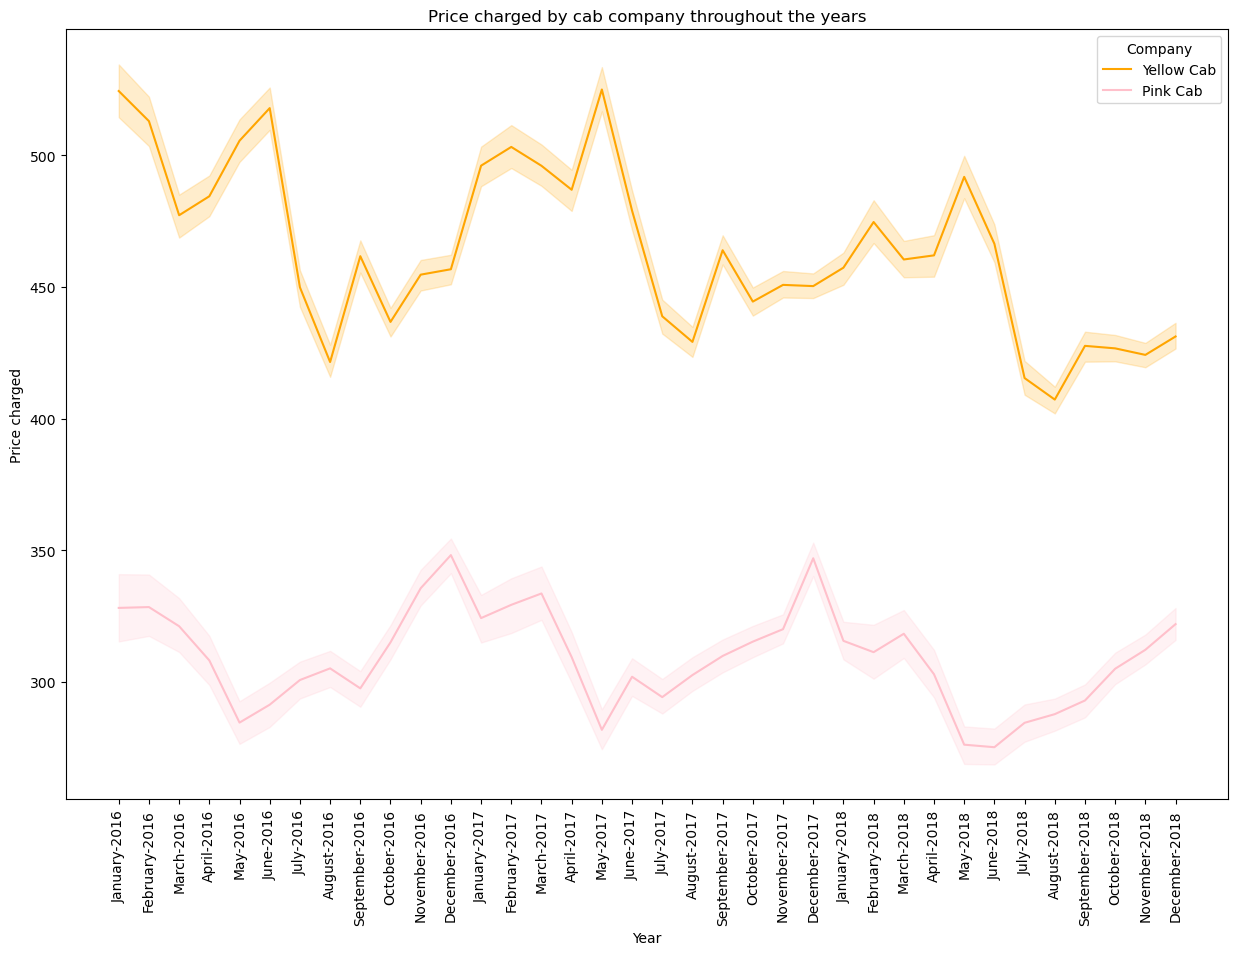

In [22]:
#The prices charged by cab companies increase over the time period covered
price_charged_df = merged_df[['Updated date of travel', 'Company', 'Price Charged']]

# Create a line plot

plt.figure(figsize=(15,10))
sns.lineplot(data=price_charged_df, x=merged_df['Updated date of travel'].apply(lambda x: x.strftime('%B-%Y')), y='Price Charged', hue='Company', palette=['orange', 'pink'])
plt.title('Price charged by cab company throughout the years')
plt.xlabel('Year')
plt.ylabel('Price charged')
plt.tick_params(axis='x', rotation=90)


plt.show()

The prices charged by both companies has been slowly declining for the 3 year time period. We can see that the line plot for both cab companies is not constantly going down. The pink company seems to charge less during the summer and more towards the end of the year. We could assume that the prices are higher in the end of the year due to the holidays period. The yellow company's line plot follows a similar trend despite having delays in its price increases and declines.

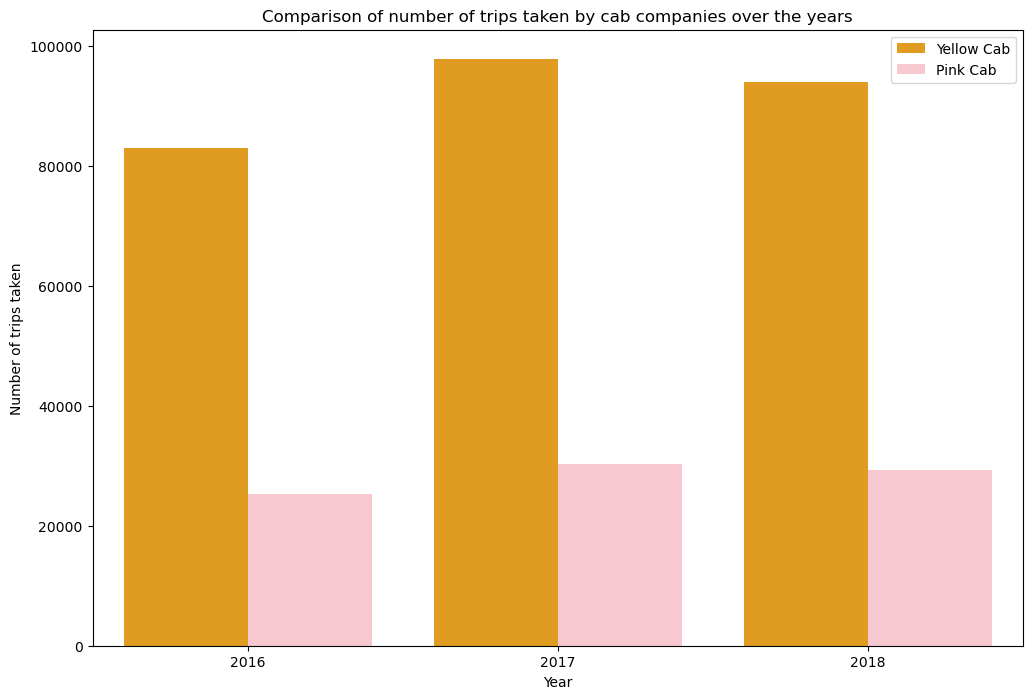

In [23]:
#The number of cab rides has increased over the time period covered in the dataset.
# Calculate and compare the number of trips taken by cab companies over the years 
merged_df['Year'] = merged_df['Updated date of travel'].dt.year

plt.figure(figsize=(12,8))
sns.countplot(data=merged_df, x='Year', hue='Company', palette=['orange', 'pink'])
plt.title('Comparison of number of trips taken by cab companies over the years')
plt.xlabel('Year')
plt.ylabel('Number of trips taken')
plt.legend()
plt.show()

The number of trips taken with the Yellow company between 2016 and 2018 is almost triple the amount of rides taken with the pink company.

In [24]:
# We calculate the average price charged by both cab companies per year
yellow_cab_avg_charged_prices = merged_df[merged_df['Company']=='Yellow Cab'].groupby('Year')['Price Charged'].mean()
pink_cab_avg_charged_prices = merged_df[merged_df['Company']=='Pink Cab'].groupby('Year')['Price Charged'].mean()
print("\nThe yearly average price charged by the Yellow Cab company are: \n", yellow_cab_avg_charged_prices)
print("\nThe yearly average price charged by the Pink Cab company are: \n", pink_cab_avg_charged_prices)


The yearly average price charged by the Yellow Cab company are: 
 Year
2016   468.23
2017   466.28
2018   440.89
Name: Price Charged, dtype: float64

The yearly average price charged by the Pink Cab company are: 
 Year
2016   315.85
2017   315.54
2018   301.54
Name: Price Charged, dtype: float64


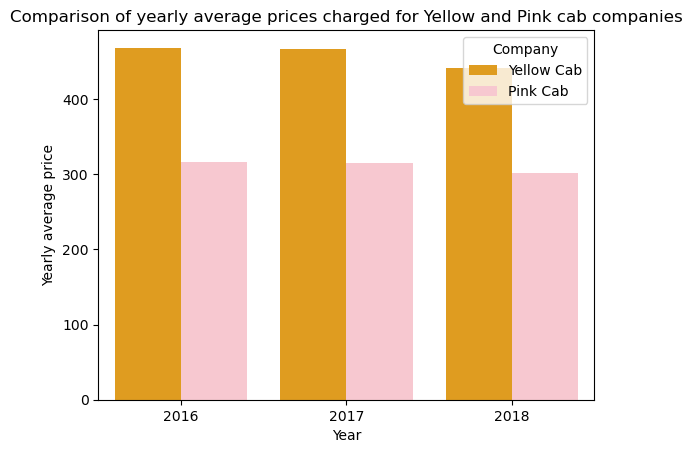

In [25]:
yellow_prices = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':yellow_cab_avg_charged_prices,
    'Company':'Yellow Cab'
})

pink_prices = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':pink_cab_avg_charged_prices,
    'Company':'Pink Cab'
})

prices = pd.concat([yellow_prices, pink_prices], ignore_index=True)
sns.barplot(data=prices, x='Year', y='Price', hue='Company', palette = ['orange', 'pink'])
plt.title('Comparison of yearly average prices charged for Yellow and Pink cab companies')
plt.ylabel('Yearly average price')

plt.show()

In [26]:
# We calculate the average cost of trip for both cab companies per year
yellow_cab_avg_trip_cost = merged_df[merged_df['Company']=='Yellow Cab'].groupby('Year')['Cost of Trip'].mean()
pink_cab_avg_trip_cost = merged_df[merged_df['Company']=='Pink Cab'].groupby('Year')['Cost of Trip'].mean()
print("\nThe yearly average cost for trips by the Yellow Cab company are: \n", yellow_cab_avg_trip_cost)
print("\nThe yearly average cost for trips by the Pink Cab company are: \n", pink_cab_avg_trip_cost)


The yearly average cost for trips by the Yellow Cab company are: 
 Year
2016   298.54
2017   297.86
2018   297.44
Name: Cost of Trip, dtype: float64

The yearly average cost for trips by the Pink Cab company are: 
 Year
2016   247.04
2017   248.82
2018   248.41
Name: Cost of Trip, dtype: float64


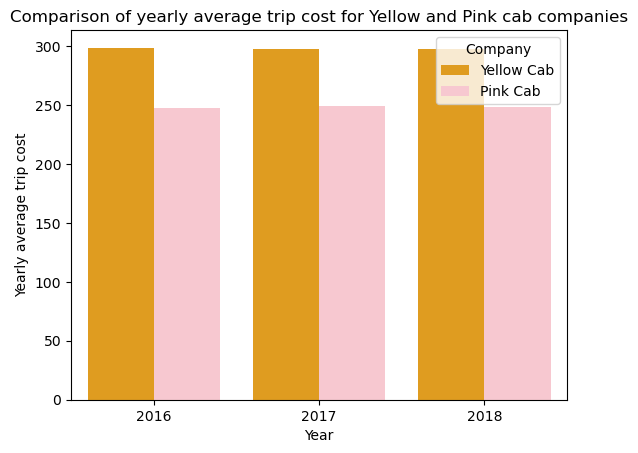

In [27]:
yellow_cost = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':yellow_cab_avg_trip_cost,
    'Company':'Yellow Cab'
})

pink_cost = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':pink_cab_avg_trip_cost,
    'Company':'Pink Cab'
})

prices = pd.concat([yellow_cost, pink_cost], ignore_index=True)
sns.barplot(data=prices, x='Year', y='Price', hue='Company', palette = ['orange', 'pink'])
plt.title('Comparison of yearly average trip cost for Yellow and Pink cab companies')
plt.ylabel('Yearly average trip cost')

plt.show()

In [29]:
# We calculate the average profits for both cab companies per year
yellow_cab_avg_profit = merged_df[merged_df['Company']=='Yellow Cab'].groupby('Year')['Profit'].mean()
pink_cab_avg_profit = merged_df[merged_df['Company']=='Pink Cab'].groupby('Year')['Profit'].mean()
print("\nThe yearly average profit made by the Yellow Cab company are: \n", yellow_cab_avg_profit)
print("\nThe yearly average profit made by the Pink Cab company are: \n", pink_cab_avg_profit)


The yearly average profit made by the Yellow Cab company are: 
 Year
2016   169.69
2017   168.42
2018   143.45
Name: Profit, dtype: float64

The yearly average profit made by the Pink Cab company are: 
 Year
2016   68.81
2017   66.71
2018   53.12
Name: Profit, dtype: float64


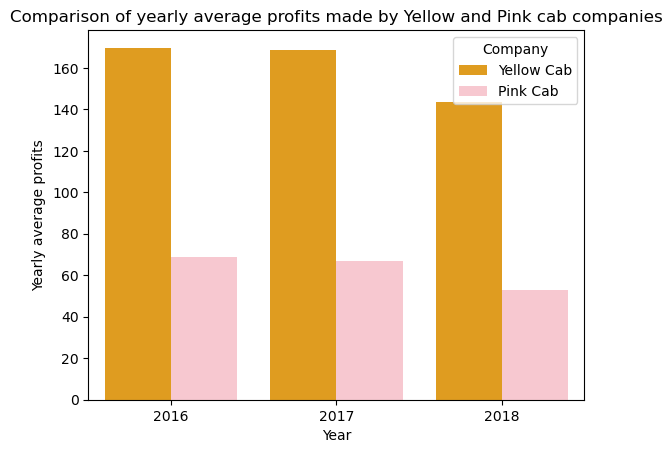

In [30]:
yellow_profit = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':yellow_cab_avg_profit,
    'Company':'Yellow Cab'
})

pink_profit = pd.DataFrame({
    'Year': [2016, 2017, 2018],
    'Price':pink_cab_avg_profit,
    'Company':'Pink Cab'
})

prices = pd.concat([yellow_profit, pink_profit], ignore_index=True)
sns.barplot(data=prices, x='Year', y='Price', hue='Company', palette = ['orange', 'pink'])
plt.title('Comparison of yearly average profits made by Yellow and Pink cab companies')
plt.ylabel('Yearly average profits')

plt.show()

In [40]:
# Define the income class boundaries and labels
income_bins = [0, 5000, 10000, float('inf')]
income_labels = ['$0-$5000 (Low Income)', '$5000-$10000 (Medium Income)', '$10000+ (High Income)']

# Create a new column 'Income Class' based on the 'Income (USD/Month)'
merged_df['Income Class'] = pd.cut(merged_df['Income (USD/Month)'], bins=income_bins, labels=income_labels)

# Group the data by 'Year', 'Company', 'Income Class', 'Age', 'Users', and 'Gender', and calculate the sum of 'Profit'
profit_analysis = merged_df.groupby(['Year', 'Company', 'Income Class', 'Age', 'Users', 'Gender'])['Profit'].sum().reset_index()

print(profit_analysis)

       Year     Company           Income Class  Age      Users  Gender  Profit
0      2016    Pink Cab  $0-$5000 (Low Income)   18    12,421   Female    0.00
1      2016    Pink Cab  $0-$5000 (Low Income)   18    12,421     Male    0.00
2      2016    Pink Cab  $0-$5000 (Low Income)   18    12,994   Female  122.55
3      2016    Pink Cab  $0-$5000 (Low Income)   18    12,994     Male    0.00
4      2016    Pink Cab  $0-$5000 (Low Income)   18   127,001   Female    0.00
...     ...         ...                    ...  ...        ...     ...     ...
32827  2018  Yellow Cab  $10000+ (High Income)   65     7,044     Male  185.58
32828  2018  Yellow Cab  $10000+ (High Income)   65    80,021   Female 1567.37
32829  2018  Yellow Cab  $10000+ (High Income)   65    80,021     Male 2572.69
32830  2018  Yellow Cab  $10000+ (High Income)   65     9,270   Female    0.00
32831  2018  Yellow Cab  $10000+ (High Income)   65     9,270     Male  364.79

[32832 rows x 7 columns]


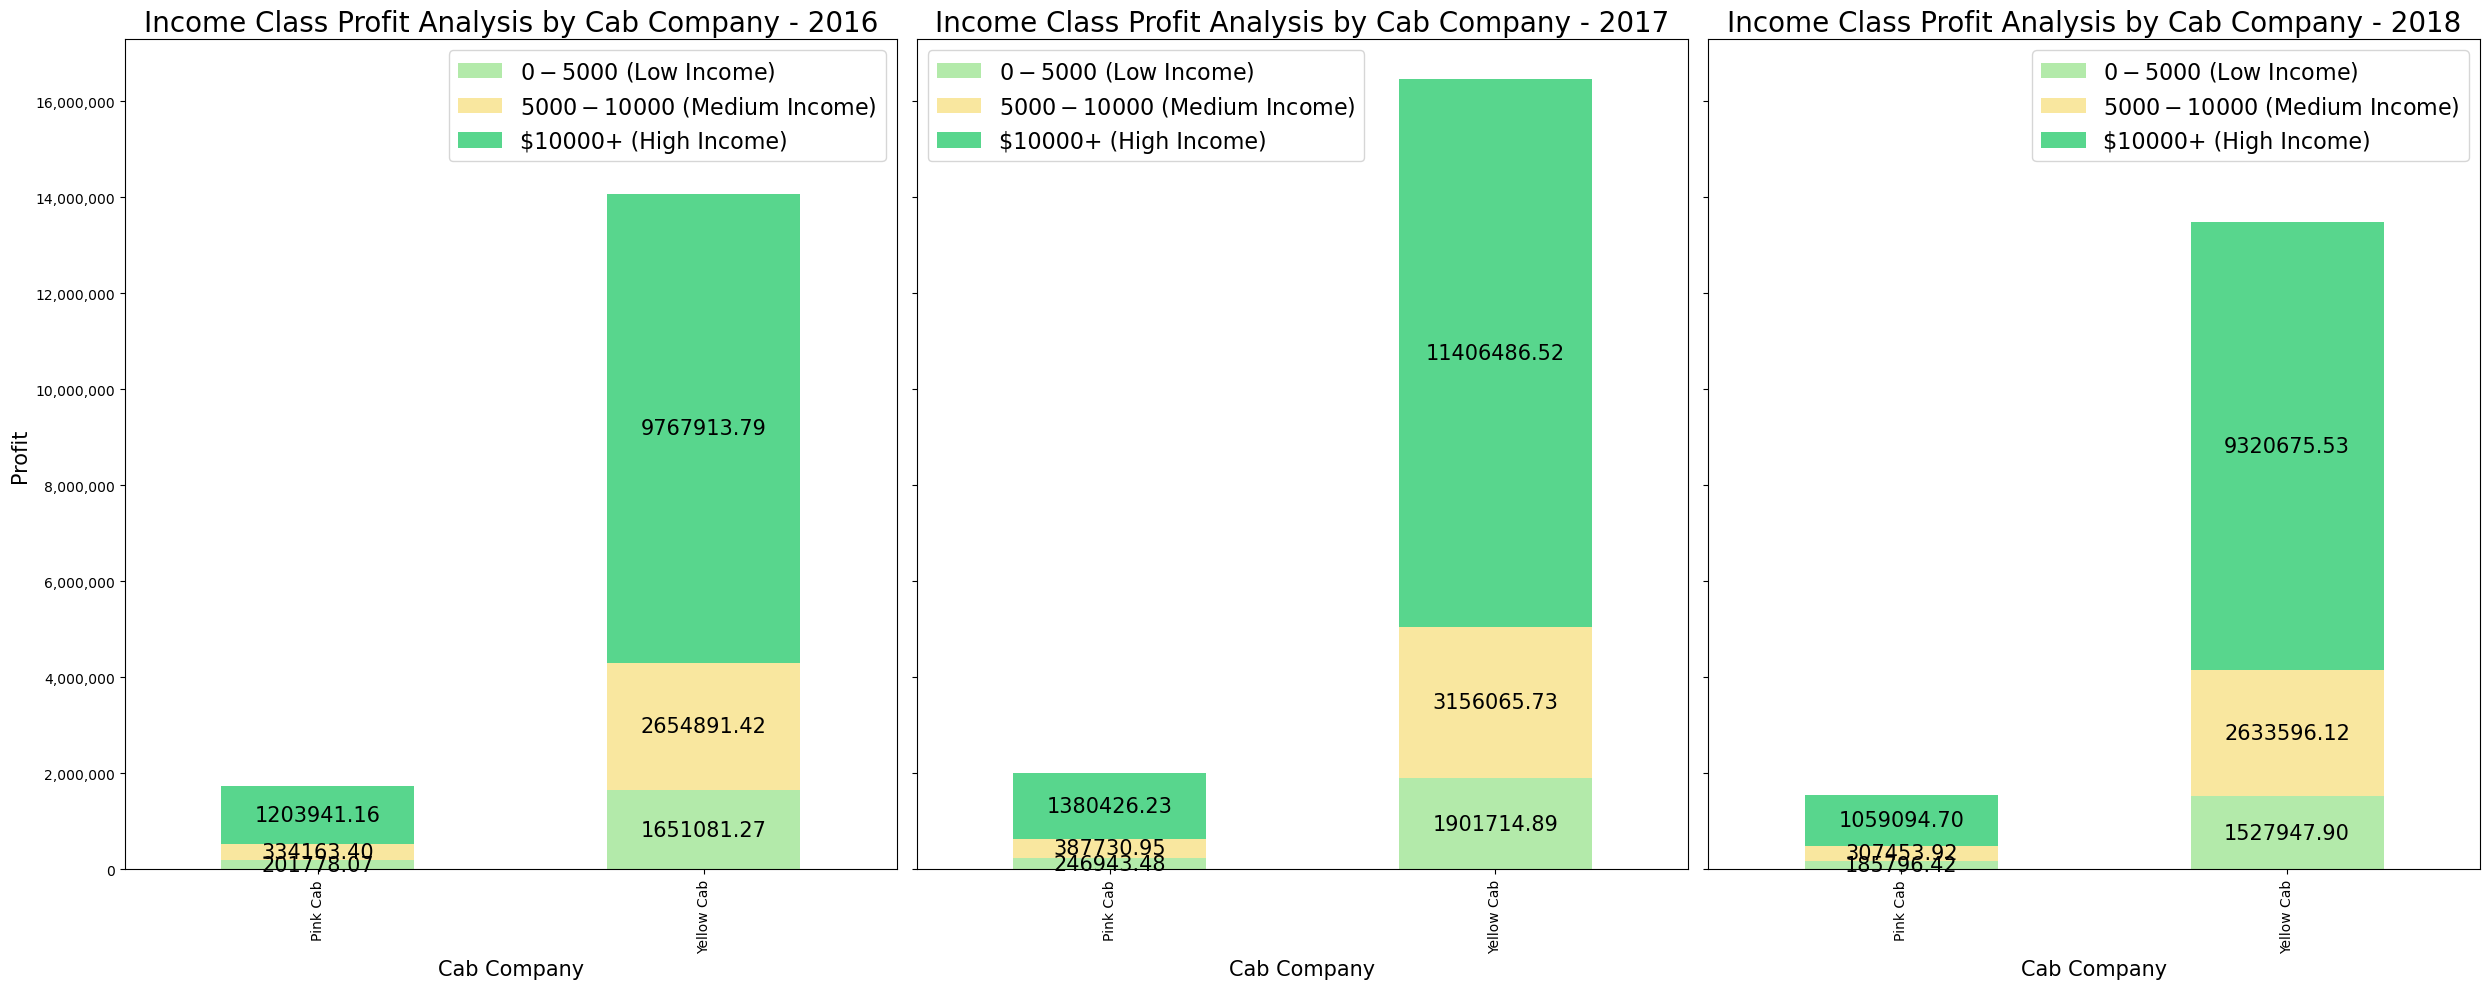

In [41]:
# Get unique years
years = merged_df['Year'].unique()
# print(years)

# Create subplots for each year
fig, axs = plt.subplots(ncols=len(years), figsize=(25, 10), sharey=True)

# Iterate over each year and create stacked bar plot
for i, year in enumerate(years):
    # Filter the data for the current year
    year_data = profit_analysis[profit_analysis['Year'] == year]

    # Pivot the year_data DataFrame to have 'Company' as index and 'Income Class' as columns
    profit_pivot = year_data.pivot_table(index='Company', columns='Income Class', values='Profit', aggfunc='sum')

    # Plot the stacked bar chart on the respective subplot
    ax = profit_pivot.plot(kind='bar', stacked=True, ax=axs[i], color=['#B3EAAA', '#F9E79F', '#58D68D'])

    # Set the labels and title for the subplot
    ax.set_xlabel('Cab Company', fontsize=15)
    ax.set_ylabel('Profit', fontsize=15)
    ax.set_title(f'Income Class Profit Analysis by Cab Company - {year}', fontsize=20)

    # Display the values on each section of the bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.2f', fontsize=15)  # Format the values with 2 decimal places

    # Remove scientific notation from y-axis tick labels
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # Show the legend
    ax.legend(fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

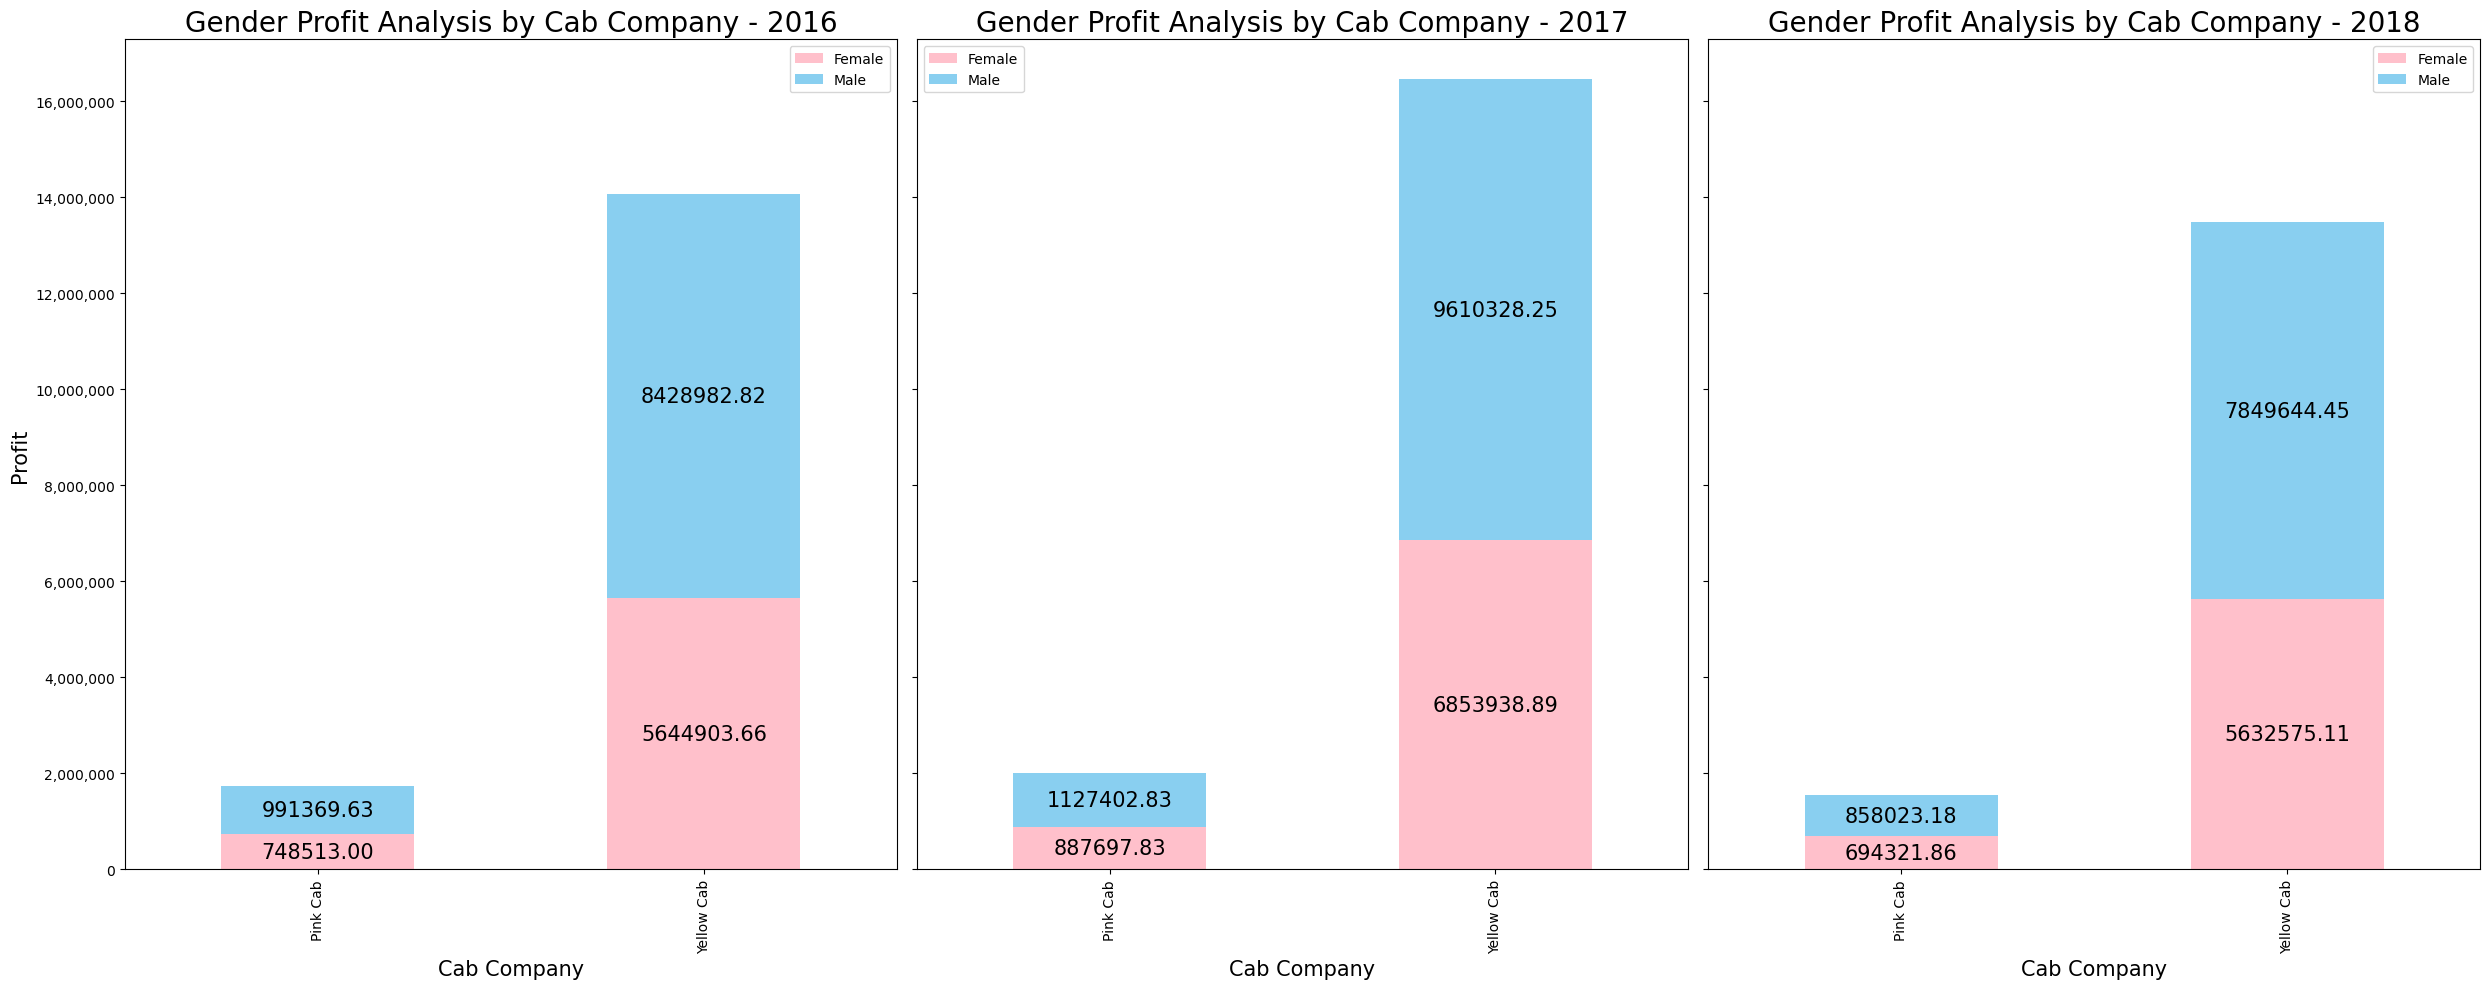

In [42]:
# Create subplots for each year
fig, axs = plt.subplots(ncols=len(years), figsize=(25, 10), sharey=True)

# Iterate over each year and create stacked bar plot
for i, year in enumerate(years):
    # Filter the data for the current year
    year_data = profit_analysis[profit_analysis['Year'] == year]

    # Pivot the year_data DataFrame to have 'Company' as index and 'Gender' as columns
    profit_pivot = year_data.pivot_table(index='Company', columns='Gender', values='Profit', aggfunc='sum')

    # Plot the stacked bar chart on the respective subplot
    ax = profit_pivot.plot(kind='bar', stacked=True, ax=axs[i], color=['pink', '#89CFF0'])

    # Set the labels and title for the subplot
    ax.set_xlabel('Cab Company', fontsize=15)
    ax.set_ylabel('Profit', fontsize=15)
    ax.set_title(f'Gender Profit Analysis by Cab Company - {year}', fontsize=20)

    # Display the values on each section of the bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.2f', fontsize=15)  # Format the values with 2 decimal places

    # Remove scientific notation from y-axis tick labels
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # Show the legend
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [43]:
# Define the age group boundaries and labels
age_bins = [18, 24, 34, 49, 64, float('inf')]
age_labels = ['18-24', '25-34', '35-49', '50-64', '65+']
# Young Adults, Young Professionals, Middle-Aged Adults, Mature Adults, Senior Citizens

# Create a new column 'Age Group' based on the 'Age'
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

# Group the data by 'Year', 'Company', 'Income Class', 'Age Group', and 'Users', and calculate the sum of 'Profit'
profit_analysis = merged_df.groupby(['Year', 'Company', 'Age Group', 'Users'])['Profit'].sum().reset_index()

print(profit_analysis)

     Year     Company Age Group      Users   Profit
0    2016    Pink Cab     18-24    12,421   2588.72
1    2016    Pink Cab     18-24    12,994   7166.23
2    2016    Pink Cab     18-24   127,001  11273.01
3    2016    Pink Cab     18-24    14,978   7719.02
4    2016    Pink Cab     18-24   144,132  70826.27
..    ...         ...       ...        ...      ...
565  2018  Yellow Cab       65+     6,133      0.00
566  2018  Yellow Cab       65+    69,995   2849.80
567  2018  Yellow Cab       65+     7,044    267.46
568  2018  Yellow Cab       65+    80,021   4751.94
569  2018  Yellow Cab       65+     9,270    348.33

[570 rows x 5 columns]


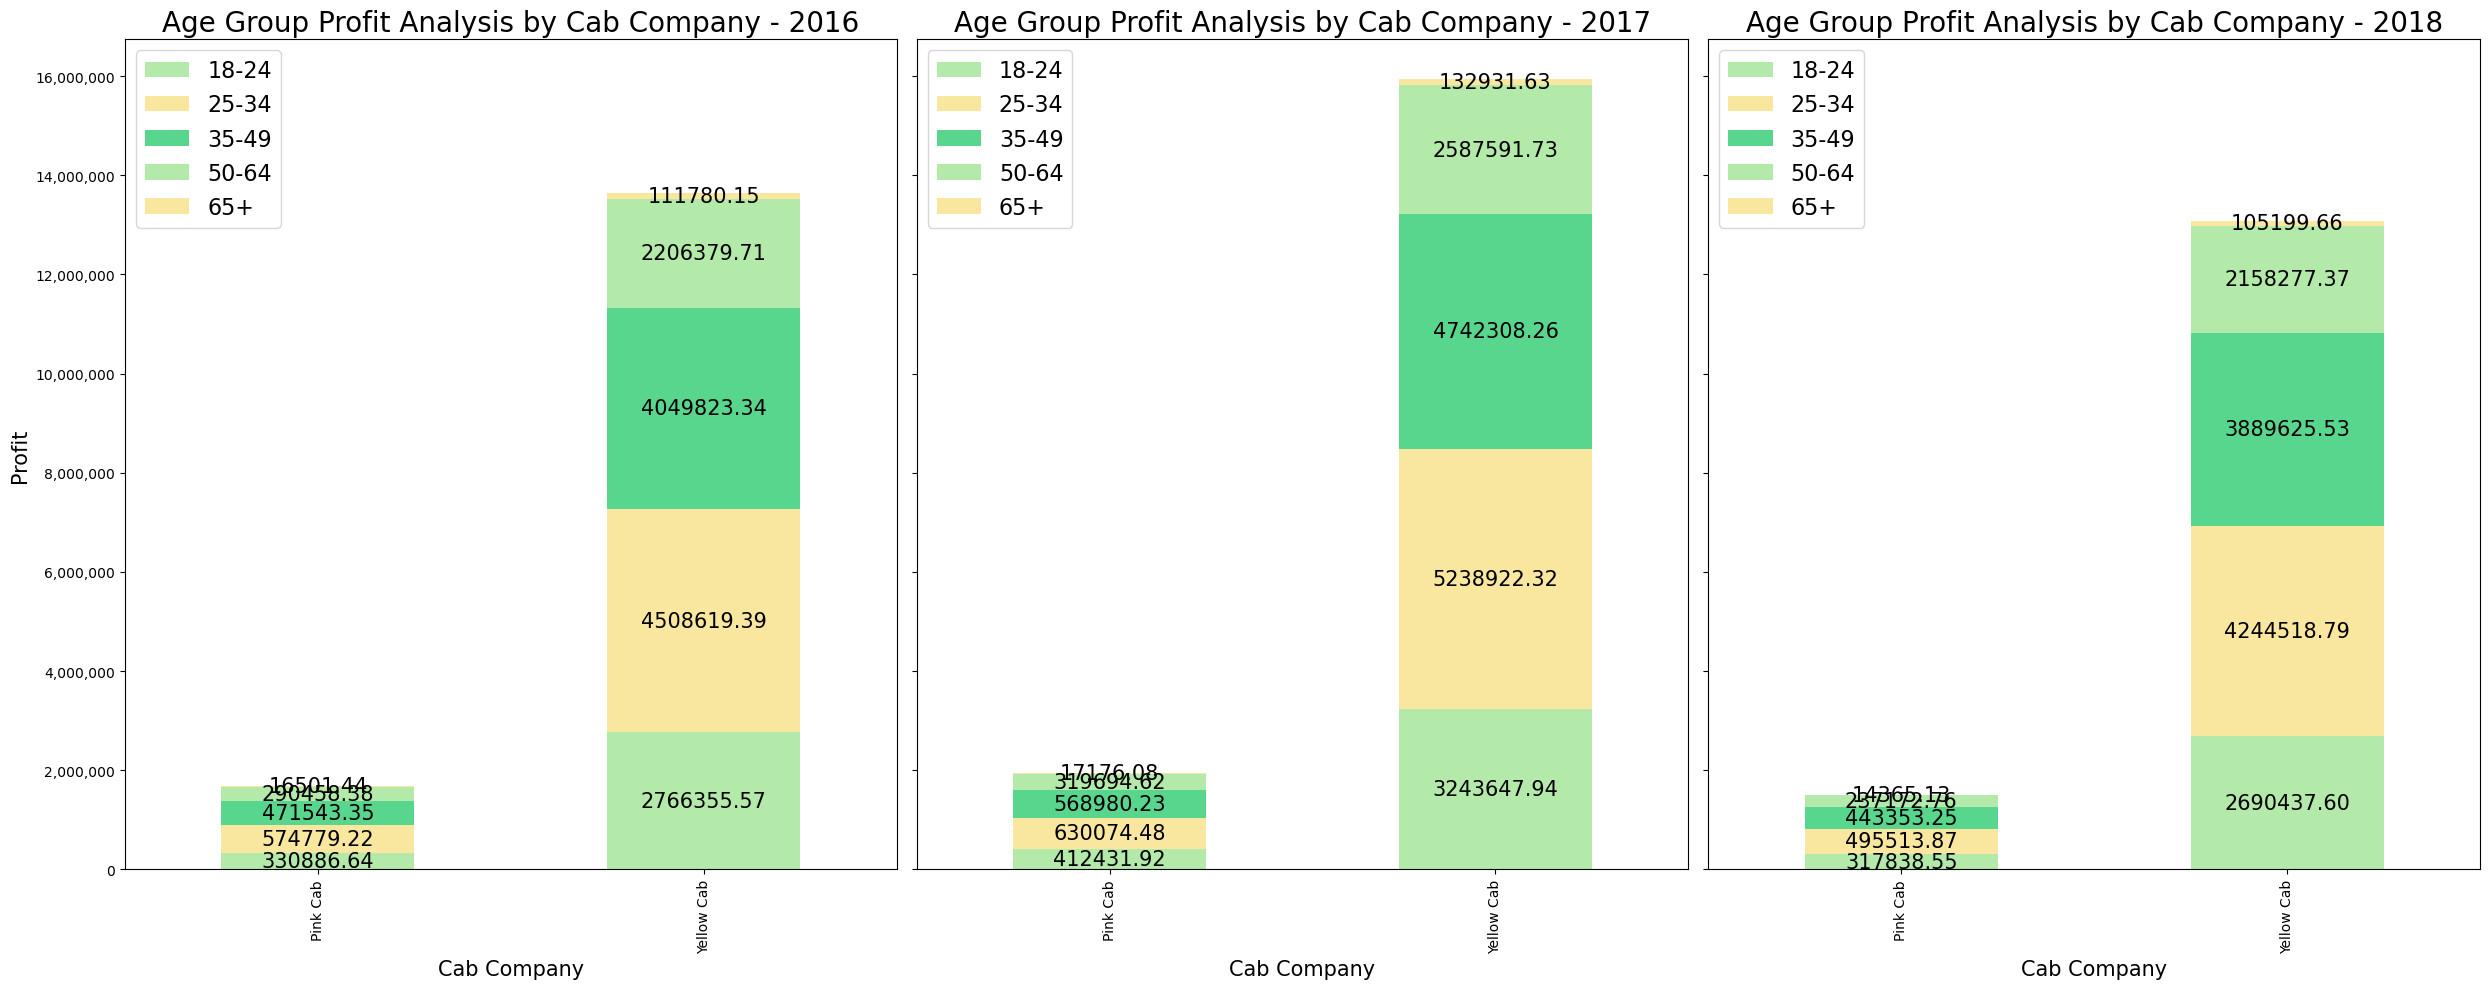

In [44]:
# Create subplots for each year
fig, axs = plt.subplots(ncols=len(years), figsize=(25, 10), sharey=True)

# Iterate over each year and create stacked bar plot
for i, year in enumerate(years):
    # Filter the data for the current year
    year_data = profit_analysis[profit_analysis['Year'] == year]

    # Pivot the year_data DataFrame to have 'Company' as index and 'Age' as columns
    profit_pivot = year_data.pivot_table(index='Company', columns='Age Group', values='Profit', aggfunc='sum')

    # Plot the stacked bar chart on the respective subplot
    ax = profit_pivot.plot(kind='bar', stacked=True, ax=axs[i], color=['#B3EAAA', '#F9E79F', '#58D68D'])

    # Set the labels and title for the subplot
    ax.set_xlabel('Cab Company', fontsize=15)
    ax.set_ylabel('Profit', fontsize=15)
    ax.set_title(f'Age Group Profit Analysis by Cab Company - {year}', fontsize=20)

    # Display the values on each section of the bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.2f', fontsize=15)  # Format the values with 2 decimal places

    # Remove scientific notation from y-axis tick labels
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # Show the legend
    ax.legend(fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [45]:
#One of the cab companies has a higher percentage of femal customers than the other.
# Calculate the percentage of men and women who took trips per year for each company
company_gender_year = merged_df.groupby(['Company', 'Gender', 'Year'])['KM Travelled'].count().reset_index()
company_gender_year['Percentage'] = company_gender_year.groupby(['Company', 'Year'])['KM Travelled'].apply(lambda x: 100 * x / float(x.sum()))

# Print the results
print(company_gender_year)

       Company  Gender  Year  KM Travelled  Percentage
0     Pink Cab  Female  2016         10965       43.37
1     Pink Cab  Female  2017         13416       44.42
2     Pink Cab  Female  2018         13099       44.83
3     Pink Cab    Male  2016         14320       56.63
4     Pink Cab    Male  2017         16789       55.58
5     Pink Cab    Male  2018         16122       55.17
6   Yellow Cab  Female  2016         34161       41.19
7   Yellow Cab  Female  2017         41603       42.56
8   Yellow Cab  Female  2018         40236       42.81
9   Yellow Cab    Male  2016         48776       58.81
10  Yellow Cab    Male  2017         56156       57.44
11  Yellow Cab    Male  2018         53749       57.19


/var/folders/k4/clqfsz8x0xv51knhq1n4z9hc0000gn/T/ipykernel_1275/1221359247.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  company_gender_year['Percentage'] = company_gender_year.groupby(['Company', 'Year'])['KM Travelled'].apply(lambda x: 100 * x / float(x.sum()))


/var/folders/k4/clqfsz8x0xv51knhq1n4z9hc0000gn/T/ipykernel_1275/4186770281.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  company_gender_year['Percentage'] = company_gender_year.groupby(['Company', 'Year'])['KM Travelled'].apply(lambda x: 100 * x / float(x.sum()))


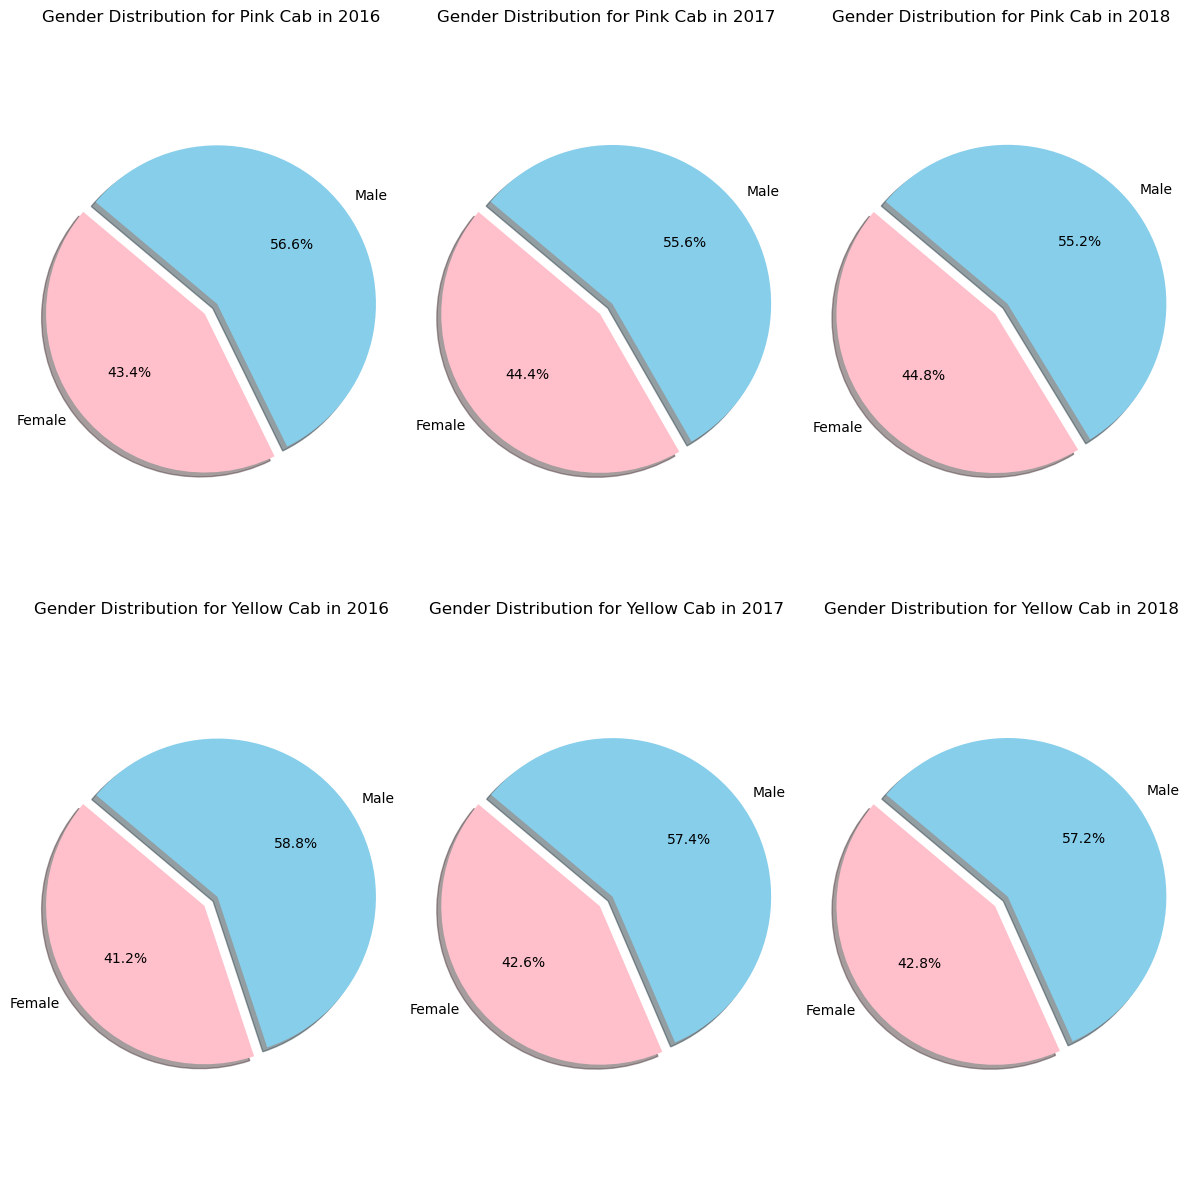

In [222]:
# Group the data by 'Company', 'Year', and 'Gender' and calculate the percentage
company_gender_year = merged_df.groupby(['Company', 'Gender', 'Year'])['KM Travelled'].count().reset_index()
company_gender_year['Percentage'] = company_gender_year.groupby(['Company', 'Year'])['KM Travelled'].apply(lambda x: 100 * x / float(x.sum()))

# Get unique companies and years
companies = company_gender_year['Company'].unique()
years = company_gender_year['Year'].unique()

# Set up the subplots
num_rows = len(companies)
num_cols = len(years)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate over each company and year
for i, company in enumerate(companies):
    for j, year in enumerate(years):
        # Filter the data for the current company and year
        data = company_gender_year[(company_gender_year['Company'] == company) & (company_gender_year['Year'] == year)]

        # Create a pie chart
        ax = axes[i, j]
        labels = data['Gender']
        sizes = data['Percentage']
        colors = ['pink', 'skyblue']
        explode = (0.1, 0)  # Explode the first slice

        ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
        ax.axis('equal')
        ax.set_title(f'Gender Distribution for {company} in {year}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


There appears to be more women cab users for both the yellow and pink companies throughout the years, with a slightly higher percentage for the Yellow company.

In [49]:
# Group the data by 'Year', 'Company' and calculate the total profit for each company in 2019
company_profit_2019 = merged_df.groupby(['Year', 'Company'])['Profit'].sum()

# Initialize an empty dictionary to store the forecasted profits
forecasted_profits = {}

# Iterate over each company
for company in company_profit_2019.index.get_level_values('Company').unique():
    # Get the profit data for the current company
    company_profit = company_profit_2019.loc[(slice(None), company)]
    
    # Fit the ARIMA model to the historical profit data for the current company
    model = ARIMA(company_profit.values, order=(1, 0, 0))
    model_fit = model.fit()
    
    # Forecast profits for the year 2019 for the current company
    forecast_start = len(company_profit)
    forecast_end = forecast_start + 1
    forecast = model_fit.predict(start=forecast_start, end=forecast_end)
    
    # Store the forecasted profit for the current company
    forecasted_profits[company] = forecast[-1]

# Print the forecasted profits for each company in 2019
for company, forecasted_profit in forecasted_profits.items():
    print("Forecasted Profit for {} in 2019: {}".format(company, forecasted_profit))

Forecasted Profit for Pink Cab in 2019: 1687778.281834269
Forecasted Profit for Yellow Cab in 2019: 14138881.400378635


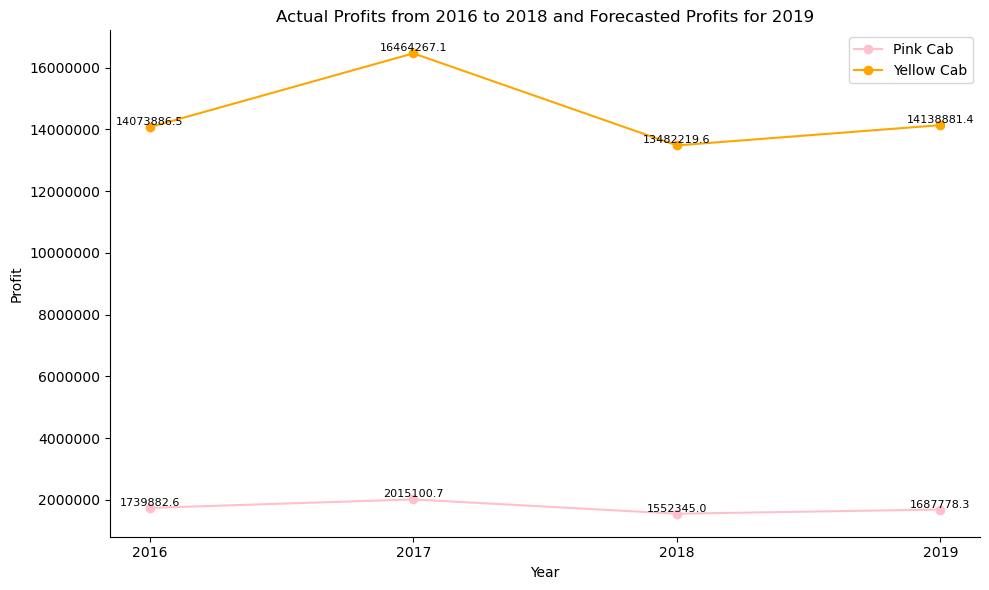

In [199]:
# Group the data by 'Year', 'Company' and calculate the total profit for each company from 2016 to 2018
company_profit_2016_2018 = merged_df[merged_df['Year'].isin([2016, 2017, 2018])].groupby(['Year', 'Company'])['Profit'].sum()

# Initialize an empty dictionary to store the forecasted profits
forecasted_profits = {}

# Iterate over each company
for company in company_profit_2016_2018.index.get_level_values('Company').unique():
    # Get the profit data for the current company
    company_profit = company_profit_2016_2018.loc[(slice(None), company)]
    
    # Fit the ARIMA model to the historical profit data for the current company
    model = ARIMA(company_profit.values, order=(1, 0, 0))
    model_fit = model.fit()
    
    # Forecast profits for the year 2019 for the current company
    forecast_start = len(company_profit)
    forecast_end = forecast_start + 1
    forecast = model_fit.predict(start=forecast_start, end=forecast_end)
    
    # Store the forecasted profit for the current company
    forecasted_profits[company] = forecast[-1]

# Plot the actual profits from 2016 to 2018 and the forecasted profits for 2019 for each company
colors = ['pink', 'orange']  # Specify the colors for the lines

fig, ax = plt.subplots(figsize=(10, 6))

for i, company in enumerate(company_profit_2016_2018.index.get_level_values('Company').unique()):
    # Get the actual profits for the current company from 2016 to 2018
    actual_profits = company_profit_2016_2018.loc[(slice(None), company)].values
    
    # Create an array with the years from 2016 to 2019
    years = np.arange(2016, 2020)
    
    # Create an array with the corresponding profits for the years 2016 to 2018 and the forecasted profit for 2019
    profits = np.concatenate([actual_profits, [forecasted_profits[company]]])
    
    # Plot the actual profits and forecasted profit with the specified color
    ax.plot(years, profits, marker='o', color=colors[i], label=company)
    
    # Add profit values as text on the plot
    for j, profit in enumerate(profits):
        ax.text(years[j], profit, '{:.1f}'.format(profit), ha='center', va='bottom', fontsize=8)

# Set the x-axis label and title
ax.set_xlabel('Year')
ax.set_ylabel('Profit')
ax.set_title('Actual Profits from 2016 to 2018 and Forecasted Profits for 2019')

# Add a legend
ax.legend()

# Set the y-axis to display values in plain format (not scientific notation)
ax.ticklabel_format(style='plain', axis='y')

# Set the x-axis ticks to display only the integer values
ax.set_xticks(np.arange(2016, 2020))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [216]:
# Group the data by 'Year', 'Company' and calculate the total profit for each company from 2016 to 2018
company_profit_2016_2018 = merged_df[merged_df['Year'].isin([2016, 2017, 2018])].groupby(['Year', 'Company'])['Profit'].sum()

# Initialize an empty dictionary to store the forecasted profits
forecasted_profits = {}

# Iterate over each company
for company in company_profit_2016_2018.index.get_level_values('Company').unique():
    # Get the profit data for the current company
    company_profit = company_profit_2016_2018.loc[(slice(None), company)]
    
    # Fit the ARIMA model to the historical profit data for the current company
    model = ARIMA(company_profit.values, order=(1, 0, 0))
    model_fit = model.fit()
    
    # Forecast profits for the year 2019 for the current company
    forecast_start = len(company_profit)
    forecast_end = forecast_start + 1
    forecast = model_fit.predict(start=forecast_start, end=forecast_end)
    
    # Store the forecasted profit for the current company
    forecasted_profits[company] = forecast[-1]

# Calculate the percentage difference between 2018 and 2019 profits for each company
percentage_difference = {}
for company in forecasted_profits:
    profit_2018 = company_profit_2016_2018.loc[(2018, company)]
    profit_2019 = forecasted_profits[company]
    difference = profit_2019 - profit_2018
    percentage_difference[company] = (difference / profit_2018) * 100

# Print the percentage difference for each company
for company, difference in percentage_difference.items():
    print(f"Percentage difference for {company}: {difference:.2f}%")


Percentage difference for Pink Cab: 8.72%
Percentage difference for Yellow Cab: 4.87%


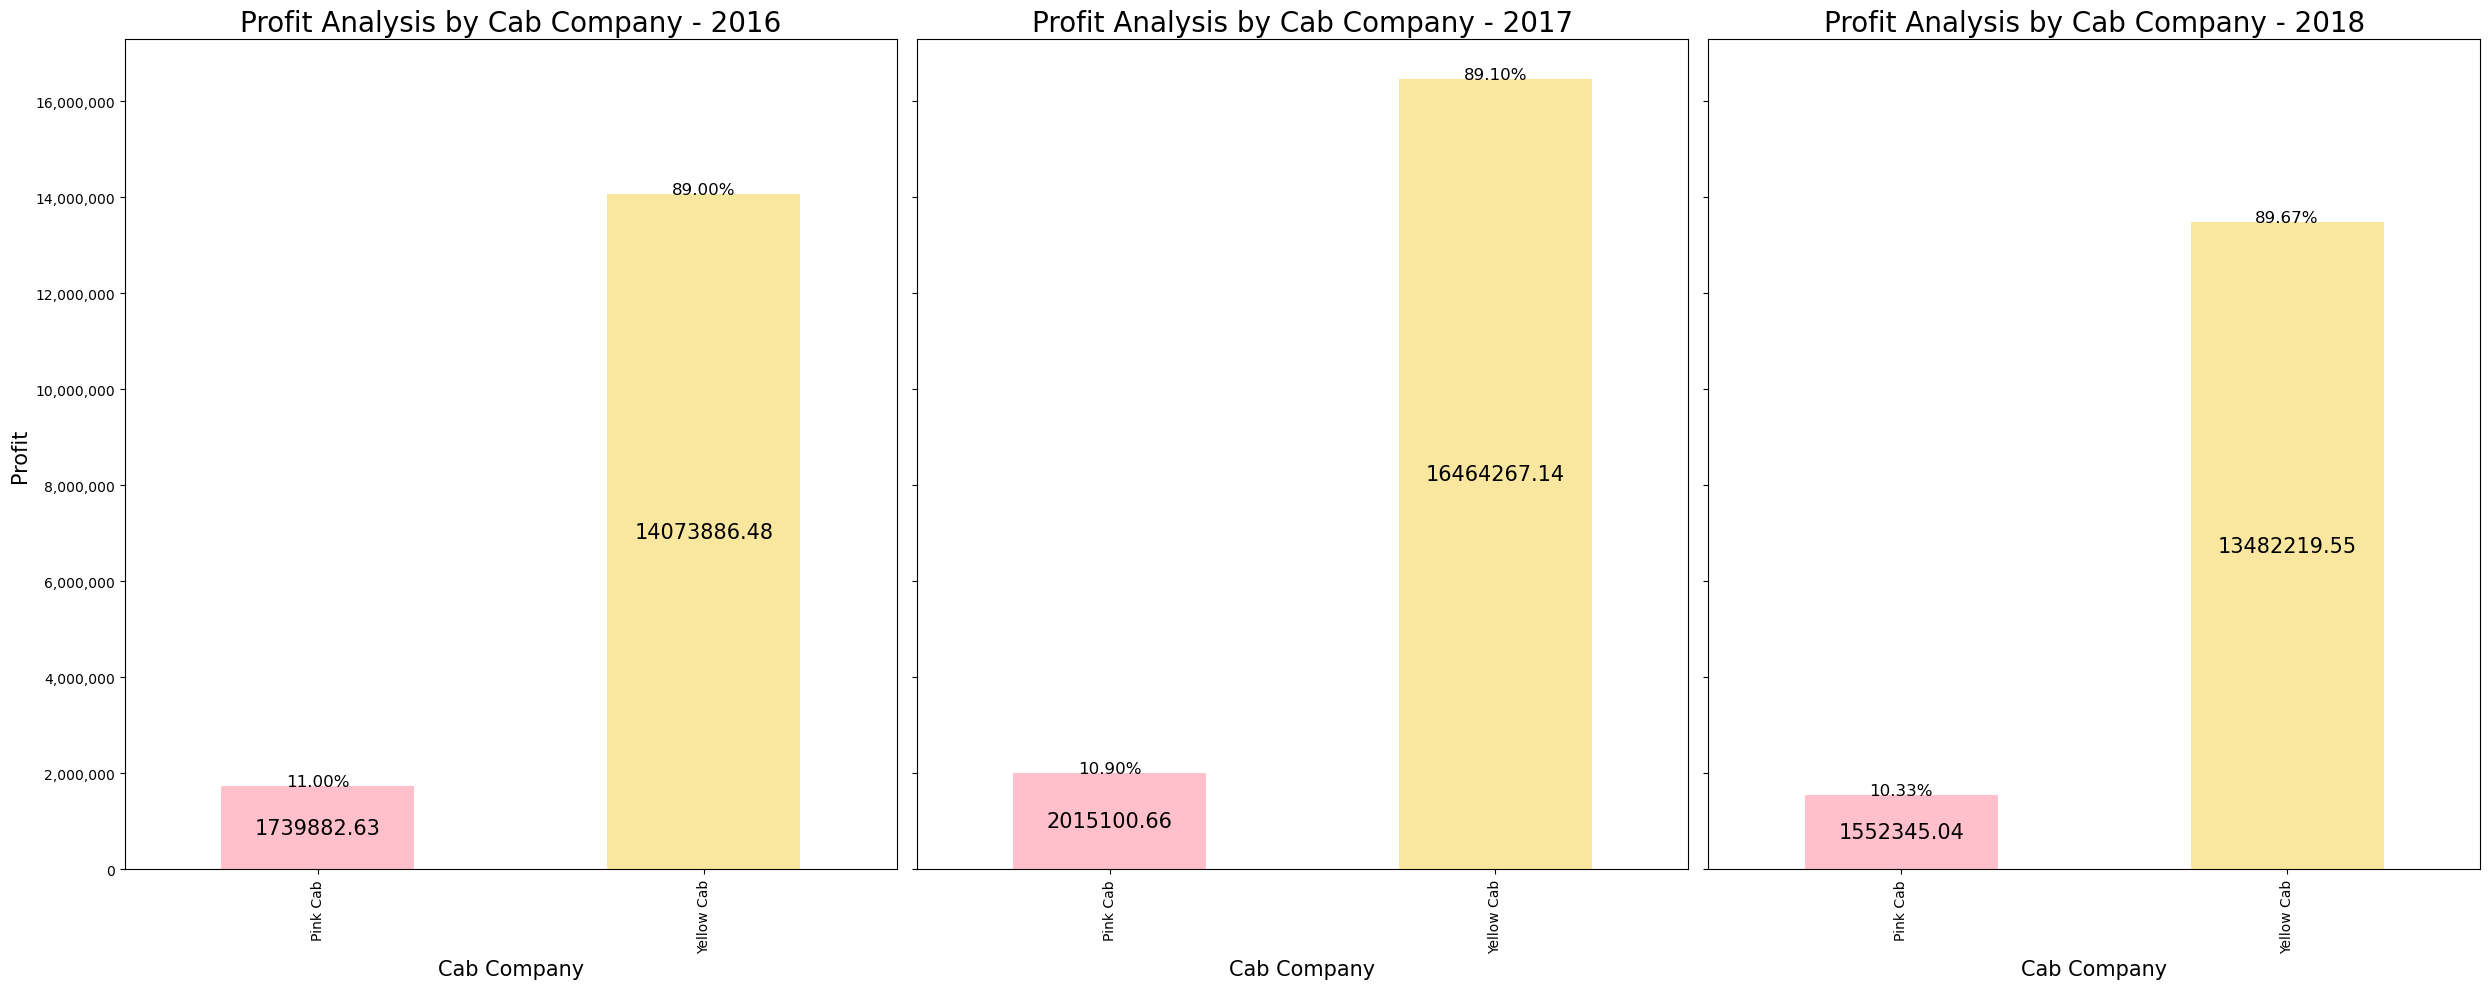

In [51]:
# Filter the data for each year and calculate the total profit for each company
profit_data = merged_df.groupby(['Year', 'Company'])['Profit'].sum().unstack('Company')

# Get unique years
years = merged_df['Year'].unique()

# Create subplots for each year
fig, axs = plt.subplots(ncols=len(years), figsize=(25, 10), sharey=True)

# Iterate over each year and create bar plot
for i, year in enumerate(years):
    # Filter the data for the current year
    year_data = profit_data.loc[year]

    # Calculate the percentage of profits for each company
    year_total_profit = year_data.sum()
    company_percent = year_data / year_total_profit * 100

    # Plot the bar chart on the respective subplot
    ax = year_data.plot(kind='bar', ax=axs[i], color=['pink', '#F9E79F'])

    # Set the labels and title for the subplot
    ax.set_xlabel('Cab Company', fontsize=15)
    ax.set_ylabel('Profit', fontsize=15)
    ax.set_title(f'Profit Analysis by Cab Company - {year}', fontsize=20)

    # Display the values on each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.2f', fontsize=15)  # Format the values with 2 decimal places

    # Display the percentage of profit on each bar
    for j, val in enumerate(year_data):
        percent_val = company_percent[j]
        ax.text(j, val + 100, f'{percent_val:.2f}%', ha='center', fontsize=12)

    # Remove scientific notation from y-axis tick labels
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


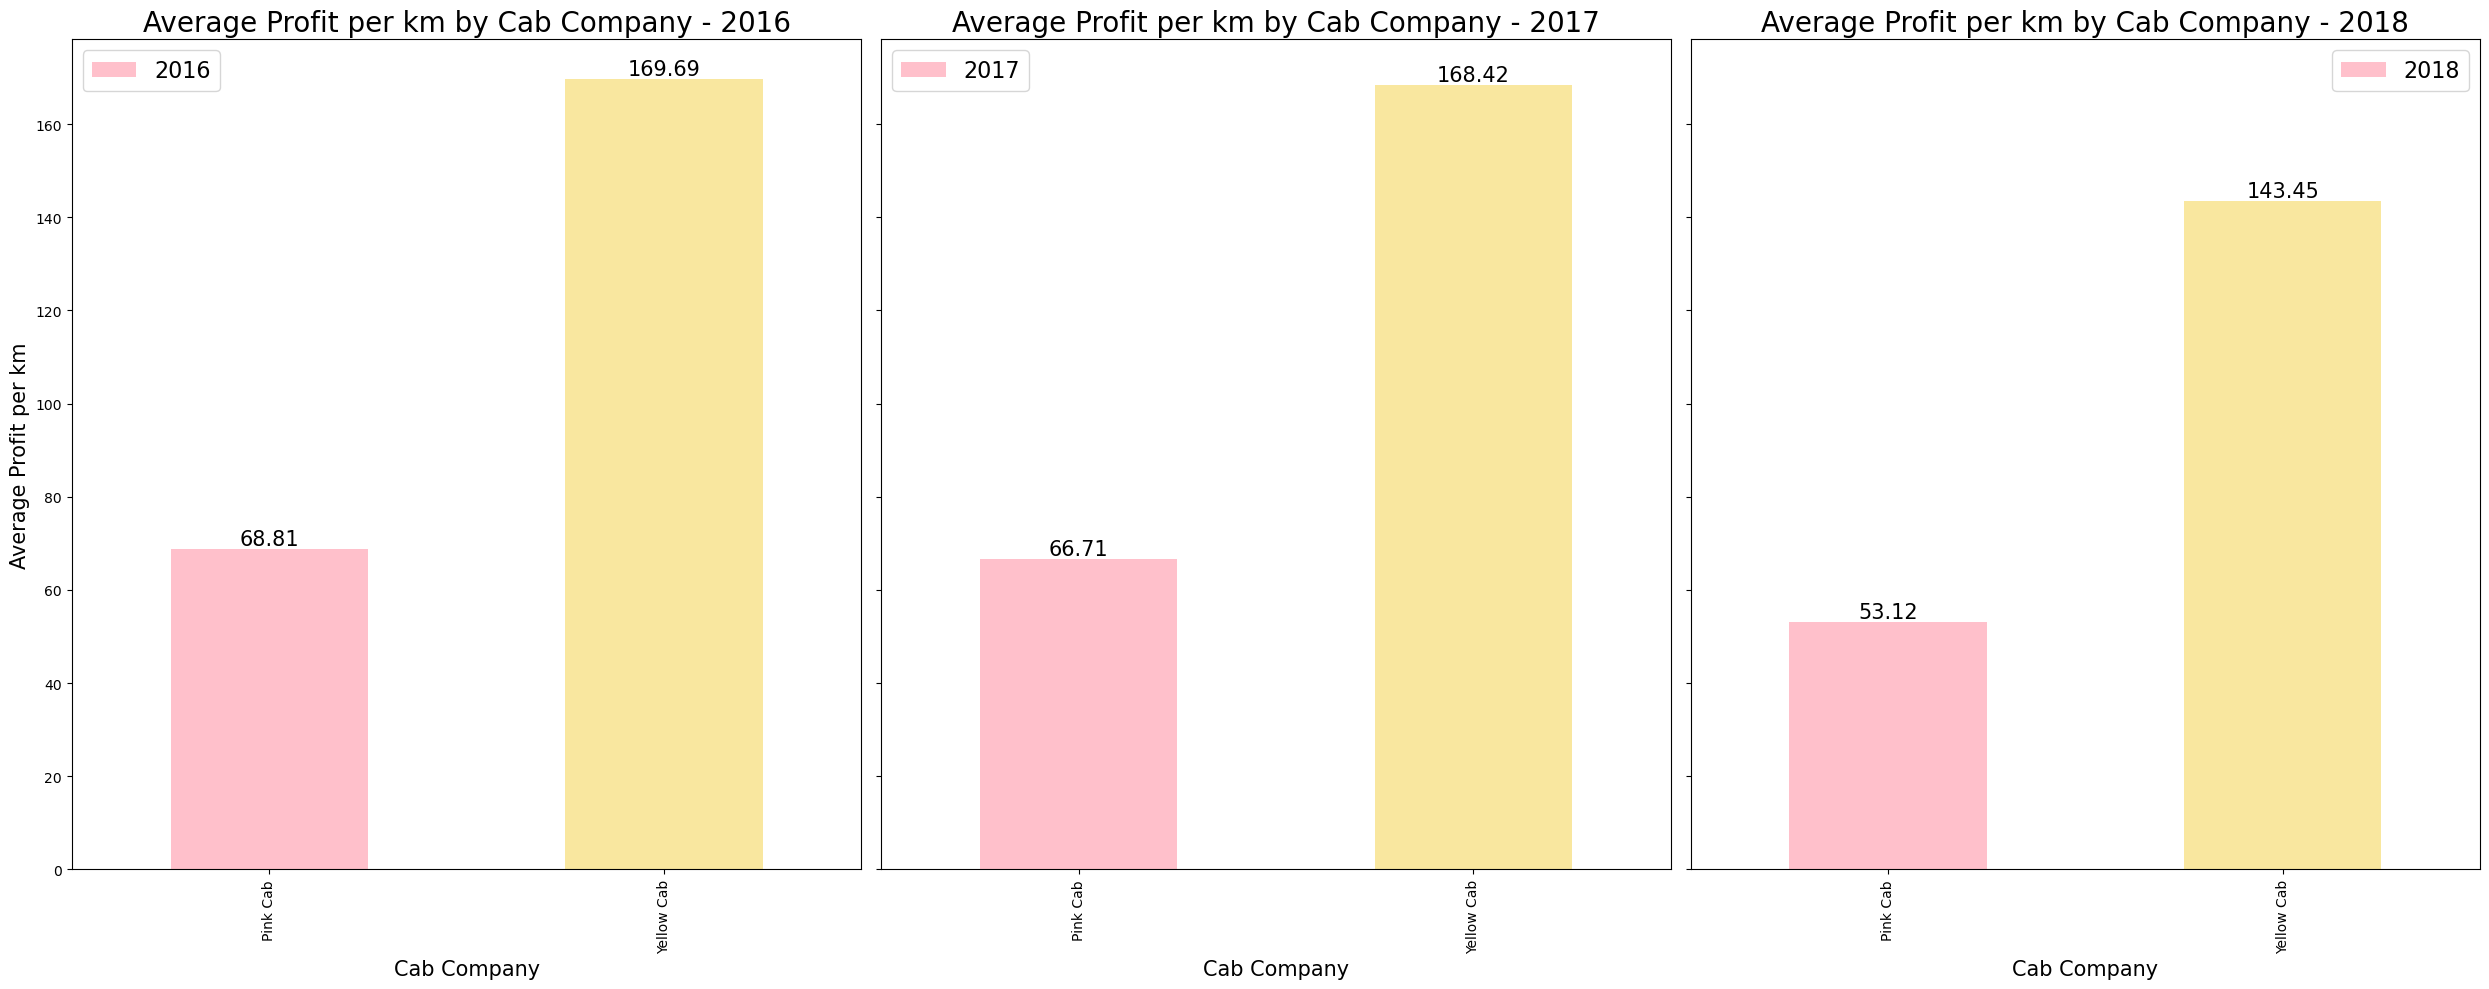

In [52]:
# Calculate the average profit per km for each company and year
avg_profit_per_km = merged_df.groupby(['Year', 'Company'])['Profit'].mean().unstack('Company')

# Get unique years
years = merged_df['Year'].unique()

# Create subplots for each year
fig, axs = plt.subplots(ncols=len(years), figsize=(25, 10), sharey=True)

# Iterate over each year and create bar plot
for i, year in enumerate(years):
    # Filter the data for the current year
    year_data = avg_profit_per_km.loc[year]

    # Plot the bar chart on the respective subplot
    ax = year_data.plot(kind='bar', ax=axs[i], color=['pink', '#F9E79F'])

    # Set the labels and title for the subplot
    ax.set_xlabel('Cab Company', fontsize=15)
    ax.set_ylabel('Average Profit per km', fontsize=15)
    ax.set_title(f'Average Profit per km by Cab Company - {year}', fontsize=20)

    # Display the values on each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fmt='%.2f', fontsize=15)  # Format the values with 2 decimal places

    # Show the legend
    ax.legend(fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

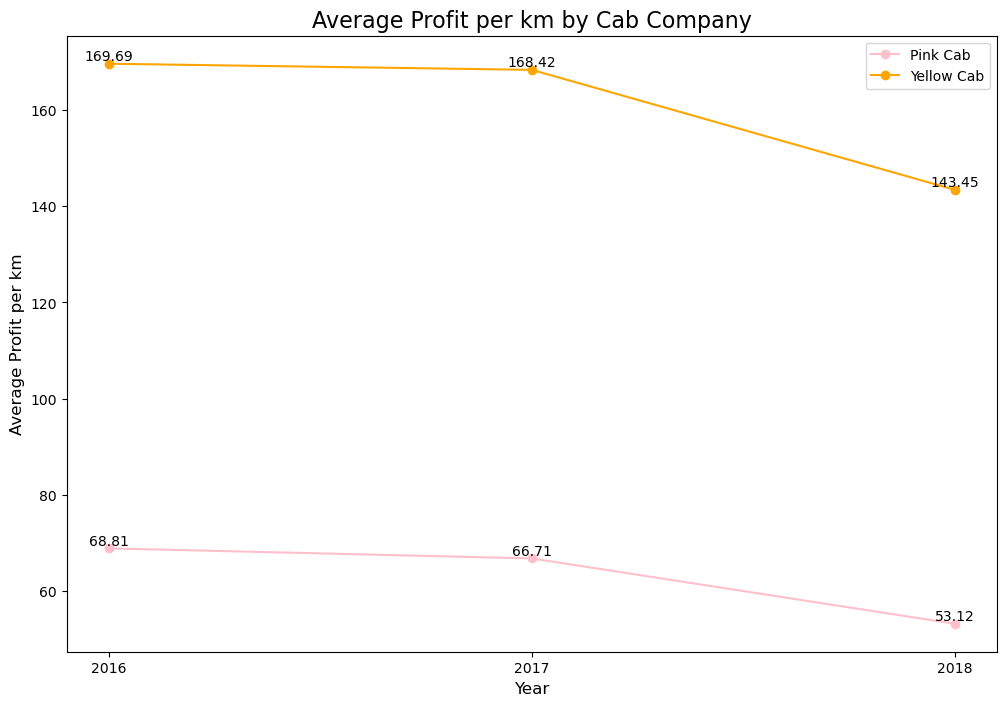

In [232]:
# Calculate the average profit per km for each company and year
avg_profit_per_km = merged_df.groupby(['Year', 'Company'])['Profit'].mean().unstack('Company')

# Plot the average profit per km for each company as a line plot
avg_profit_per_km.plot(marker='o', figsize=(12, 8), color=['pink', 'orange'])

# Set the labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Profit per km', fontsize=12)
plt.title('Average Profit per km by Cab Company', fontsize=16)

# Show the legend
plt.legend(fontsize=10)

# Add values to the line plot
for company in avg_profit_per_km.columns:
    for year, profit in avg_profit_per_km[company].items():
        plt.text(year, profit, f'{profit:.2f}', ha='center', va='bottom')

# Remove values like 2016.25, 2016.50 from x-axis
plt.xticks(list(avg_profit_per_km.index))

# Show the plot
plt.show()


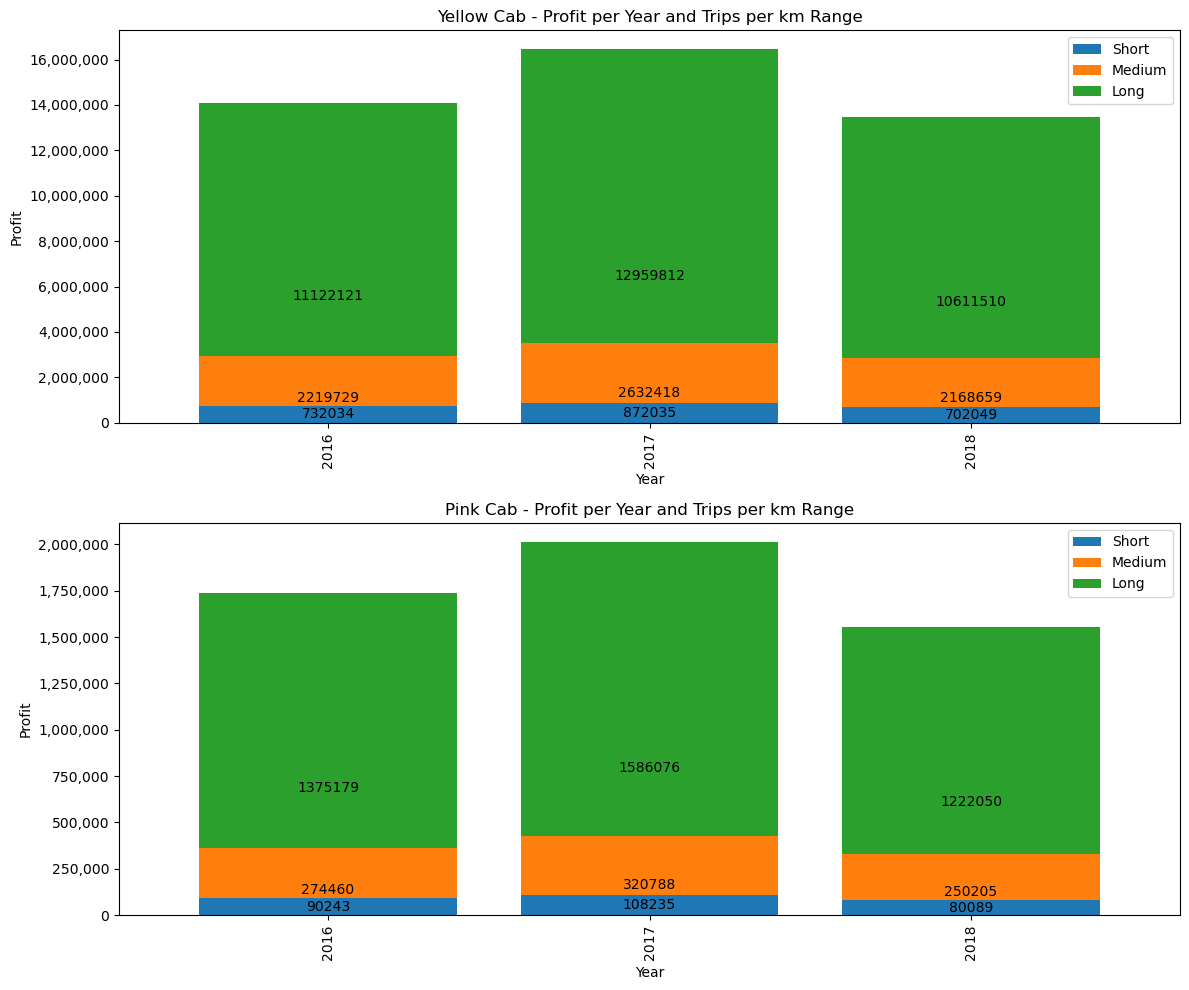

In [231]:
import seaborn as sns

range_limits = [0, 10, 20, float('inf')]
range_labels = ['Short', 'Medium', 'Long']

# Create the range classes for trips per km
merged_df['Trips per km Range'] = pd.cut(merged_df['KM Travelled'], bins=range_limits, labels=range_labels)

# Filter the data for each company
yellow_cab_data = merged_df[merged_df['Company'] == 'Yellow Cab']
pink_cab_data = merged_df[merged_df['Company'] == 'Pink Cab']

# Calculate the profit per year and range class for Yellow Cab
yellow_profit_per_range = yellow_cab_data.groupby(['Year', 'Trips per km Range'])['Profit'].sum().unstack('Trips per km Range')

# Calculate the profit per year and range class for Pink Cab
pink_profit_per_range = pink_cab_data.groupby(['Year', 'Trips per km Range'])['Profit'].sum().unstack('Trips per km Range')

# Create separate plots for each company
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot for Yellow Cab
yellow_profit_per_range.plot(kind='bar', stacked=True, width=0.8, ax=axes[0])
axes[0].set_title('Yellow Cab - Profit per Year and Trips per km Range')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Profit')

# Remove scientific notation from y-axis tick labels
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add values inside the bars for Yellow Cab
for container in axes[0].containers:
    for rect in container:
        width = rect.get_width()
        height = rect.get_height()
        if height > 0:
            axes[0].text(rect.get_x() + width / 2, height / 2, int(height), ha='center', va='center')


# Plot for Pink Cab
pink_profit_per_range.plot(kind='bar', stacked=True, width=0.8, ax=axes[1])
axes[1].set_title('Pink Cab - Profit per Year and Trips per km Range')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Profit')

# Remove scientific notation from y-axis tick labels
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add values inside the bars for Pink Cab
for container in axes[1].containers:
    for rect in container:
        width = rect.get_width()
        height = rect.get_height()
        if height > 0:
            axes[1].text(rect.get_x() + width / 2, height / 2, int(height), ha='center', va='center')

# Remove duplicate legend entries for each plot
handles_yellow, labels_yellow = axes[0].get_legend_handles_labels()
by_label_yellow = dict(zip(labels_yellow, handles_yellow))
axes[0].legend(by_label_yellow.values(), by_label_yellow.keys())

handles_pink, labels_pink = axes[1].get_legend_handles_labels()
by_label_pink = dict(zip(labels_pink, handles_pink))
axes[1].legend(by_label_pink.values(), by_label_pink.keys())

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


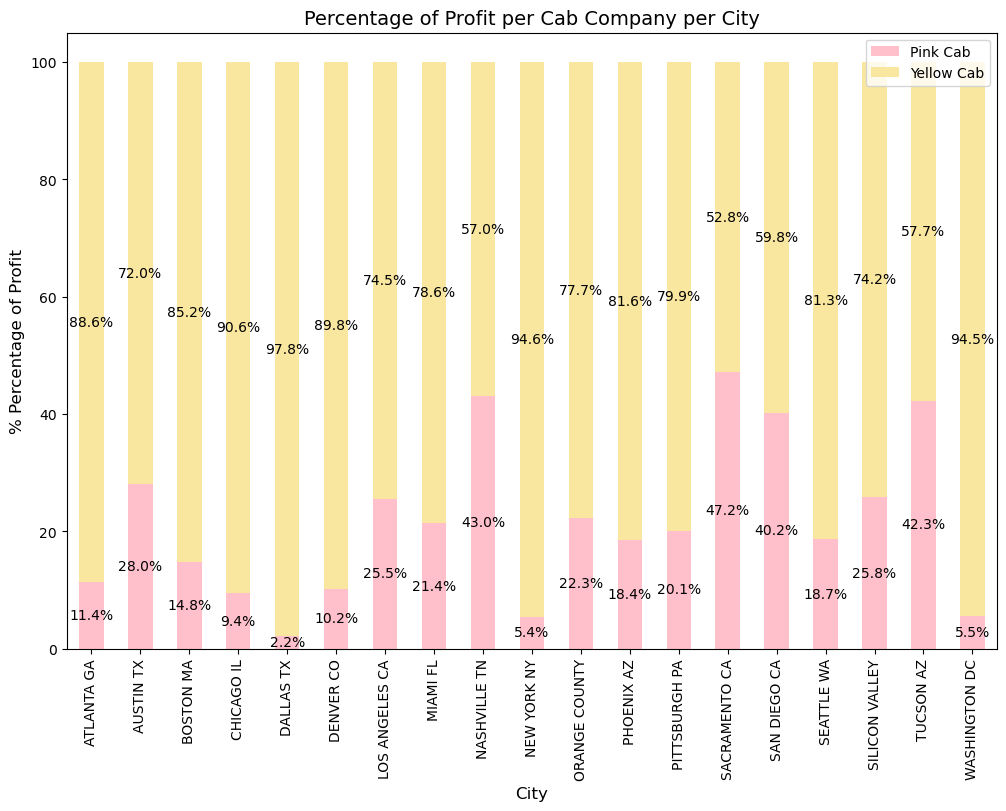

In [54]:
# Calculate the total profit per cab company and city
profit_data = merged_df.groupby(['Company', 'City'])['Profit'].sum().unstack('Company')

# Calculate the percentage of profit per cab company and city
profit_percent = profit_data.div(profit_data.sum(axis=1), axis=0) * 100

# Create the stacked bar plot
ax = profit_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=['pink', '#F9E79F'])

# Set the labels and title
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('% Percentage of Profit', fontsize=12)
ax.set_title('Percentage of Profit per Cab Company per City', fontsize=14)

# Display the percentages on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=10)

# Display the legend
ax.legend(loc='upper right')

# Show the plot
plt.show()

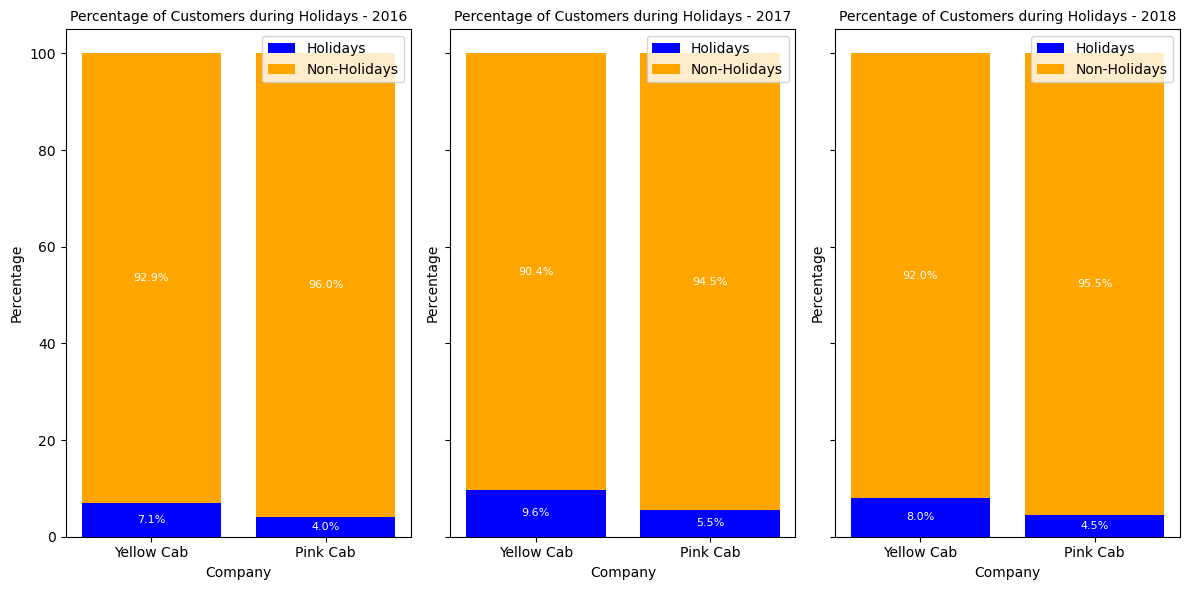

In [135]:
# Group the data by company and year and count the number of unique customers during holidays
holiday_customers = merged_df[merged_df['Is Holiday'] == True].groupby(['Company', 'Year'])['Customer ID'].nunique()

# Group the data by company and year and count the number of unique customers during non-holidays
non_holiday_customers = merged_df[merged_df['Is Holiday'] == False].groupby(['Company', 'Year'])['Customer ID'].nunique()

# Get the unique companies and years
companies = merged_df['Company'].unique()
years = merged_df['Year'].unique()

# Create a stacked bar plot for each year
fig, axs = plt.subplots(ncols=len(years), figsize=(12, 6), sharey=True)

# Iterate over each year and create the stacked bar plot for each company
for i, year in enumerate(years):
    # Get the holiday and non-holiday customer counts for the current year
    holiday_counts = holiday_customers.loc[:, year].reindex(companies, fill_value=0)
    non_holiday_counts = non_holiday_customers.loc[:, year].reindex(companies, fill_value=0)

    # Calculate the total customers for each year
    total_customers = holiday_counts + non_holiday_counts

    # Calculate the percentage of customers during holidays
    holiday_percent = (holiday_counts / total_customers) * 100

    # Calculate the percentage of customers during non-holidays
    non_holiday_percent = (non_holiday_counts / total_customers) * 100

    # Plot the stacked bar chart for the current year
    ax = axs[i]
    ax.bar(companies, holiday_percent, label='Holidays', color='blue')
    ax.bar(companies, non_holiday_percent, bottom=holiday_percent, label='Non-Holidays', color='orange')
    ax.set_title(f'Percentage of Customers during Holidays - {year}', fontsize=10)
    ax.set_xlabel('Company')
    ax.set_ylabel('Percentage')
    ax.legend()

    # Add percentage labels inside the bars
    for j, percent in enumerate(holiday_percent):
        ax.text(j, percent / 2, f'{percent:.1f}%', ha='center', va='center', color='white', fontsize=8)
    for j, percent in enumerate(non_holiday_percent):
        ax.text(j, percent / 2 + holiday_percent[j], f'{percent:.1f}%', ha='center', va='center', color='white', fontsize=8)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

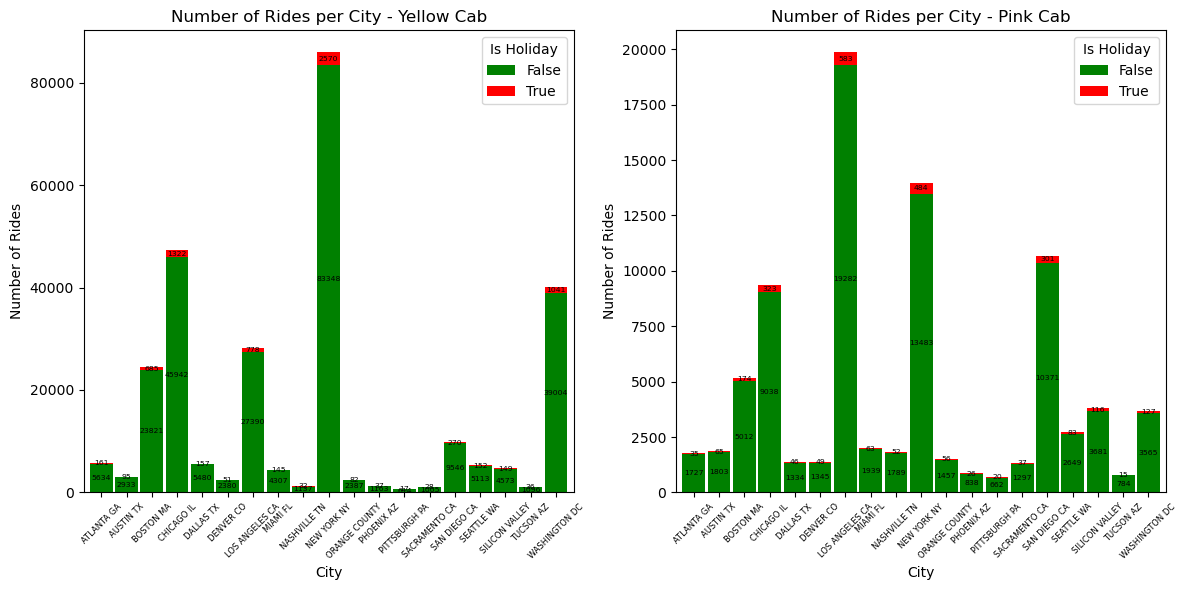

In [92]:
# Group the data by city, company, and count the number of rides during holidays and non-holidays
rides_per_city_company = merged_df.groupby(['City', 'Company', 'Is Holiday']).size().unstack('Is Holiday').fillna(0)

# Filter the data for Yellow Cab and Pink Cab companies
yellow_company_data = rides_per_city_company.loc[(rides_per_city_company.index.get_level_values('Company') == 'Yellow Cab')]
pink_company_data = rides_per_city_company.loc[(rides_per_city_company.index.get_level_values('Company') == 'Pink Cab')]

# Create subplots for Yellow Cab and Pink Cab companies
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the stacked bar chart for Yellow Cab
yellow_company_data.plot(kind='bar', stacked=True, ax=axs[0], width= 0.9, color=['green', 'red'])
axs[0].set_title('Number of Rides per City - Yellow Cab')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Number of Rides')
axs[0].set_xticklabels(yellow_company_data.index.get_level_values('City'), rotation=45, fontsize=6)

# Display the number of rides inside the bars for Yellow Cab
for container in axs[0].containers:
    axs[0].bar_label(container, label_type='center', fontsize=5.5)


# Plot the stacked bar chart for Pink Cab
pink_company_data.plot(kind='bar', stacked=True, ax=axs[1], width= 0.9, color=['green', 'red'])
axs[1].set_title('Number of Rides per City - Pink Cab')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Number of Rides')
axs[1].set_xticklabels(pink_company_data.index.get_level_values('City'), rotation=45, fontsize=6)

# Display the number of rides inside the bars for Pink Cab
for container in axs[1].containers:
    axs[1].bar_label(container, label_type='center', fontsize=5.5)
    
# Show the plots
plt.tight_layout()
plt.show()


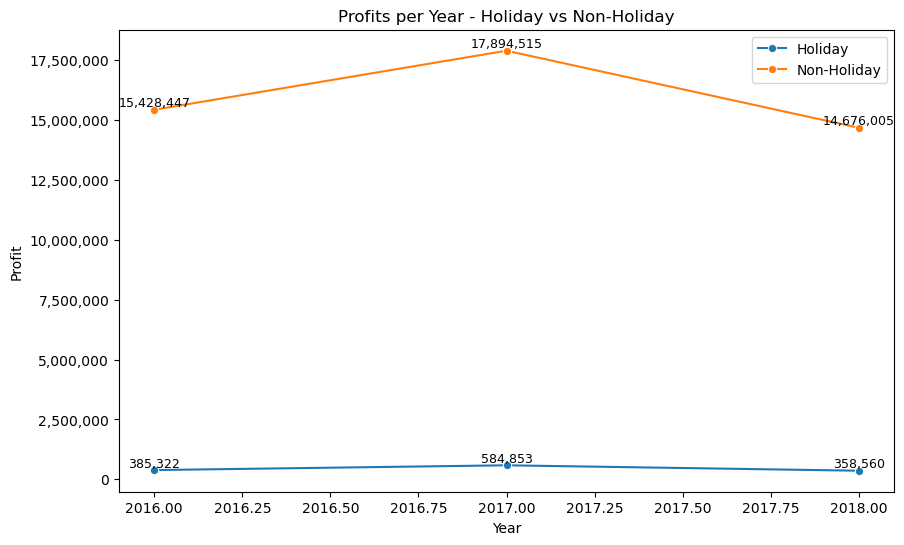

In [109]:
# Filter the data for when Is Holiday is True
holiday_data = merged_df[merged_df['Is Holiday'] == True]

# Group the data by year and calculate the sum of profits
holiday_profits = holiday_data.groupby('Year')['Profit'].sum()

# Filter the data for when Is Holiday is False
non_holiday_data = merged_df[merged_df['Is Holiday'] == False]

# Group the data by year and calculate the sum of profits
non_holiday_profits = non_holiday_data.groupby('Year')['Profit'].sum()

# Convert the 'Year' column to integers
holiday_profits.index = holiday_profits.index.astype(int)
non_holiday_profits.index = non_holiday_profits.index.astype(int)

# Plot the line graphs
plt.figure(figsize=(10, 6))
sns.lineplot(data=holiday_profits, marker='o', label='Holiday')
sns.lineplot(data=non_holiday_profits, marker='o', label='Non-Holiday')
plt.title('Profits per Year - Holiday vs Non-Holiday')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend()

# Remove scientific notation from y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add the profit values on the plot
for year, profit in holiday_profits.items():
    plt.text(year, profit, f'{profit:,.0f}', ha='center', va='bottom', fontsize=9)

for year, profit in non_holiday_profits.items():
    plt.text(year, profit, f'{profit:,.0f}', ha='center', va='bottom', fontsize=9)

plt.show()



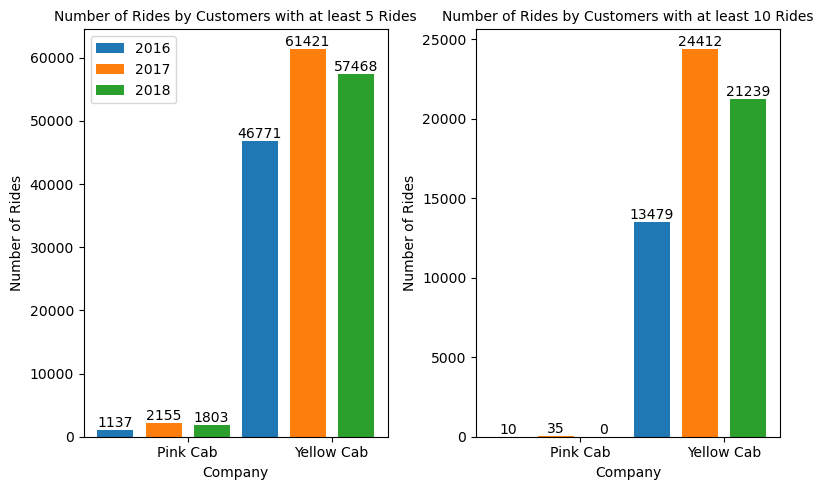

In [149]:
# Define the minimum number of rides for each subplot
min_rides_values = [5, 10]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(min_rides_values), figsize=(8, 5))

# Iterate over minimum rides values and create a grouped bar chart for each
for i, min_rides in enumerate(min_rides_values):
    # Filter the data to include only customers with at least the specified minimum number of rides
    filtered_data = merged_df.groupby(['Year', 'Company', 'Customer ID']).filter(lambda x: len(x) >= min_rides)

    # Group the data by year, company, and customer ID to count the number of rides per customer
    rides_per_customer = filtered_data.groupby(['Year', 'Company', 'Customer ID']).size().reset_index(name='Rides')

    # Pivot the data to have years as columns and companies as rows
    pivot_table = rides_per_customer.pivot_table(values='Rides', index='Company', columns='Year', aggfunc=np.sum, fill_value=0)

    # Get the years and companies from the pivot table
    years = pivot_table.columns
    companies = pivot_table.index

    # Set the width of each bar and the spacing between groups
    bar_width = 0.3
    space_width = 0.1

    # Calculate the total width for each group
    total_width = (bar_width + space_width) * len(years)

    # Calculate the starting position for each group
    start_positions = np.arange(len(companies)) * total_width

    # Plot the bars for each year and company in the current subplot
    for j, year in enumerate(years):
        bars = axes[i].bar(start_positions + j * (bar_width + space_width), pivot_table[year], bar_width, label=year)

        # Add the values inside the bars
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

    # Set the x-axis ticks and labels for the current subplot
    axes[i].set_xticks(start_positions + total_width / 2)
    axes[i].set_xticklabels(companies)
    axes[i].set_xlabel('Company')
    axes[i].set_ylabel('Number of Rides')
    axes[i].set_title(f'Number of Rides by Customers with at least {min_rides} Rides', fontsize=10)

    # Add the legend to the first subplot only
    if i == 0:
        axes[i].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Insights and recommendations:

Based on our exploratory analysis, here are some recommendations for the cab investment company. 

1. Focus on Yellow Cab's Profitability: The Yellow Cab company has consistently shown higher profits compared to the Pink Cab company. It is recommended to allocate more resources and investments towards the Yellow Cab company to capitalize on its success and maximize profitability.
2. Exploit Growth Opportunities in Top Cities: Identify the top-performing cities such as Boston, Chicago, Washington DC, New York, and Los Angeles, which have the highest number of rides. Focus on expanding operations in these cities and capture a larger market share by improving service quality, optimizing driver availability, and investing in marketing and promotions.
3. Target Cities with High Cab User Percentages: In addition to the cities with the highest ride numbers, consider cities like San Francisco, Washington DC, and Boston that have a high percentage of the population as cab users. These cities show potential for a larger customer base and increased revenue generation.
4. Optimize Marketing and Pricing Strategies: Conduct market research and analysis to identify customer preferences, price sensitivity, and competitor strategies. Utilize this information to fine-tune marketing campaigns, target specific customer segments effectively, and optimize pricing strategies to maximize profits.
5. Address Declining Profit per Kilometre: The analysis indicates a decline in average profit per kilometer traveled between 2016 and 2018. Investigate the factors contributing to this decline and implement measures to improve profitability. This may involve optimizing operational efficiency, reducing costs, or exploring alternative revenue streams.
6. Re-evaluate Holiday Strategy: As the analysis suggests, the percentage of cab riders during holidays is relatively low, and profits tend to be lower compared to non-holiday periods. Re-evaluate the holiday strategy and consider reallocating resources or adjusting pricing strategies during these periods. Explore potential opportunities to increase demand and profitability during holidays through targeted promotions, special offers, or unique services.
7. Target High-Income Customers: Both Yellow Cab and Pink Cab companies generate a significant portion of their profits from high-income customers. To further increase profits, it is advisable to develop strategies to attract and retain high-income customers. This can include offering premium services, loyalty programs, and personalized experiences that cater to their needs.
8. Focus on Profitable Customer Segments: Analyse the profitability of different customer segments, such as age groups and income classes. Allocate resources and marketing efforts towards the age groups and income classes that generate the highest profits for both Yellow Cab and Pink Cab. Tailor services and promotional activities to cater to their specific needs and preferences.
9. Enhance Customer Loyalty Programs and Capitalize on Customer Satisfaction and Loyalty: Leverage the higher customer loyalty observed in Yellow Cab compared to Pink Cab. Further strengthen customer loyalty by introducing or improving loyalty programs that reward frequent riders, such as discounts, exclusive offers, and personalized perks. This can help increase customer retention and foster long-term relationships with riders. Invest in driver training programs, improve service quality, and ensure a seamless and enjoyable customer experience. Positive word-of-mouth and customer recommendations can help attract new customers and strengthen the brand reputation.


